In [51]:
import pandas as pd 
import os
import matplotlib.pyplot as plt 


In [52]:
df = pd.read_csv("observation-meteorologique-historiques-france-synop0.csv", encoding="utf-8", delimiter = ";")
df.head()

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/3789998320.py:1: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("observation-meteorologique-historiques-france-synop0.csv", encoding="utf-8", delimiter = ";")


ID OMM station                       Date  Pression au niveau mer  \
0            7761  2010-01-05T19:00:00+01:00                 99490.0   
1            7790  2010-03-01T16:00:00+01:00                101130.0   
2            7790  2010-02-27T22:00:00+01:00                100990.0   
3            7790  2010-02-28T10:00:00+01:00                100300.0   
4            7790  2010-02-25T16:00:00+01:00                100710.0   

   Variation de pression en 3 heures  Type de tendance barométrique  \
0                             -100.0                            7.0   
1                              -50.0                            5.0   
2                             -240.0                            6.0   
3                               70.0                            3.0   
4                              -80.0                            7.0   

   Direction du vent moyen 10 mn  Vitesse du vent moyen 10 mn  Température  \
0                           60.0                          1.5       285.05   
1                          330.0                          3.6       285.65   
2                          150.0                          1.5       282.45   
3                          230.0                          2.1       288.95   
4                           30.0                          1.5       288.55   

   Point de rosée  Humidité  ...  Altitude  communes (name)  communes (code)  \
0          284.15      94.0  ...         5          Ajaccio            2a004   
1          284.25      91.0  ...        10         Lucciana            2b148   
2          280.75      89.0  ...        10         Lucciana            2b148   
3          284.15      73.0  ...        10         Lucciana            2b148   
4          282.85      69.0  ...        10         Lucciana            2b148   

           EPCI (name)  EPCI (code)  department (name)  department (code)  \
0  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
1    CC de Marana-Golo    200036499        Haute-Corse                 2b   
2    CC de Marana-Golo    200036499        Haute-Corse                 2b   
3    CC de Marana-Golo    200036499        Haute-Corse                 2b   
4    CC de Marana-Golo    200036499        Haute-Corse                 2b   

   region (name)  region (code)  mois_de_l_annee  
0          Corse             94                1  
1          Corse             94                3  
2          Corse             94                2  
3          Corse             94                2  
4          Corse             94                2  

[5 rows x 82 columns]

In [53]:
for column in df.columns:
    print(column, df[column].nunique())

ID OMM station 2
Date 44734
Pression au niveau mer 556
Variation de pression en 3 heures 125
Type de tendance barométrique 9
Direction du vent moyen 10 mn 37
Vitesse du vent moyen 10 mn 177
Température 393
Point de rosée 377
Humidité 93
Visibilité horizontale 5829
Temps présent 60
Temps passé 1 9
Temps passé 2 9
Nebulosité totale 10
Nébulosité  des nuages de l' étage inférieur 10
Hauteur de la base des nuages de l'étage inférieur 119
Type des nuages de l'étage inférieur 11
Type des nuages de l'étage moyen 11
Type des nuages de l'étage supérieur 11
Pression station 552
Niveau barométrique 0
Géopotentiel 0
Variation de pression en 24 heures 454
Température minimale sur 12 heures 308
Température minimale sur 24 heures 0
Température maximale sur 12 heures 355
Température maximale sur 24 heures 0
Température minimale du sol sur 12 heures 349
Méthode de mesure Température du thermomètre mouillé 0
Température du thermomètre mouillé 0
Rafale sur les 10 dernières minutes 280
Rafales sur une pér

In [54]:
len(df)

89327

In [55]:
print("Station 7790: ", len(df[df["ID OMM station"] == 7790]))
print("Station 7761: ", len(df[df["ID OMM station"] == 7761])),

Station 7790:  44647
Station 7761:  44680


(None,)

In [56]:
from datetime import datetime

def parse_date(date_string):
  # Parse the date string, ignoring the timezone offset
  dt = datetime.strptime(date_string[:19], '%Y-%m-%dT%H:%M:%S')
  return dt

df['Date'] = df['Date'].apply(parse_date)
df.head(10)


ID OMM station                Date  Pression au niveau mer  \
0            7761 2010-01-05 19:00:00                 99490.0   
1            7790 2010-03-01 16:00:00                101130.0   
2            7790 2010-02-27 22:00:00                100990.0   
3            7790 2010-02-28 10:00:00                100300.0   
4            7790 2010-02-25 16:00:00                100710.0   
5            7790 2010-02-25 22:00:00                100580.0   
6            7761 2010-04-28 02:00:00                102210.0   
7            7790 2010-04-28 08:00:00                102360.0   
8            7790 2010-04-28 14:00:00                102370.0   
9            7761 2010-04-27 02:00:00                101990.0   

   Variation de pression en 3 heures  Type de tendance barométrique  \
0                             -100.0                            7.0   
1                              -50.0                            5.0   
2                             -240.0                            6.0   
3                               70.0                            3.0   
4                              -80.0                            7.0   
5                             -120.0                            7.0   
6                               50.0                            1.0   
7                              100.0                            3.0   
8                              -70.0                            8.0   
9                             -100.0                            8.0   

   Direction du vent moyen 10 mn  Vitesse du vent moyen 10 mn  Température  \
0                           60.0                          1.5       285.05   
1                          330.0                          3.6       285.65   
2                          150.0                          1.5       282.45   
3                          230.0                          2.1       288.95   
4                           30.0                          1.5       288.55   
5                          250.0                          0.5       281.15   
6                           50.0                          2.6       285.65   
7                          220.0                          1.0       288.45   
8                           20.0                          2.6       296.05   
9                           40.0                          2.6       285.65   

   Point de rosée  Humidité  ...  Altitude  communes (name)  communes (code)  \
0          284.15      94.0  ...         5          Ajaccio            2a004   
1          284.25      91.0  ...        10         Lucciana            2b148   
2          280.75      89.0  ...        10         Lucciana            2b148   
3          284.15      73.0  ...        10         Lucciana            2b148   
4          282.85      69.0  ...        10         Lucciana            2b148   
5          280.25      94.0  ...        10         Lucciana            2b148   
6          284.75      94.0  ...         5          Ajaccio            2a004   
7          285.75      84.0  ...        10         Lucciana            2b148   
8          284.45      48.0  ...        10         Lucciana            2b148   
9          284.55      93.0  ...         5          Ajaccio            2a004   

           EPCI (name)  EPCI (code)  department (name)  department (code)  \
0  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
1    CC de Marana-Golo    200036499        Haute-Corse                 2b   
2    CC de Marana-Golo    200036499        Haute-Corse                 2b   
3    CC de Marana-Golo    200036499        Haute-Corse                 2b   
4    CC de Marana-Golo    200036499        Haute-Corse                 2b   
5    CC de Marana-Golo    200036499        Haute-Corse                 2b   
6  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
7    CC de Marana-Golo    200036499        Haute-Corse                 2b   
8    CC de Marana-Golo    200036499        Haute-Corse                 2

In [57]:
print(df[df['ID OMM station'] == 7790].shape[0])
print(df[df['ID OMM station'] == 7761].shape[0])

44647
44680


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89327 entries, 0 to 89326
Data columns (total 82 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   ID OMM station                                             89327 non-null  int64         
 1   Date                                                       89327 non-null  datetime64[ns]
 2   Pression au niveau mer                                     89002 non-null  float64       
 3   Variation de pression en 3 heures                          89244 non-null  float64       
 4   Type de tendance barométrique                              89259 non-null  float64       
 5   Direction du vent moyen 10 mn                              89286 non-null  float64       
 6   Vitesse du vent moyen 10 mn                                89290 non-null  float64       
 7   Température                    

In [59]:
before_cols = set(df.columns)  # Store original column names
df = df.dropna(axis=1, how="all")  # Drop null columns
after_cols = set(df.columns)  # Store new column names

dropped_cols = before_cols - after_cols  # Find dropped columns
print("Dropped columns:", dropped_cols)

Dropped columns: {'Température maximale sur 24 heures (°C)', 'Température maximale sur 24 heures', 'Méthode de mesure Température du thermomètre mouillé', 'Température minimale sur 24 heures (°C)', 'Niveau barométrique', 'Température du thermomètre mouillé', 'Température minimale sur 24 heures', 'Géopotentiel'}


In [60]:
df_7761 = df[df['ID OMM station'] == 7761]
df_7790 = df[df['ID OMM station'] == 7790]

df_7761.reset_index(inplace=True)
df_7790.reset_index(inplace=True)

In [61]:
os.makedirs("NumericalColumnsStationComparison", exist_ok=True)

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


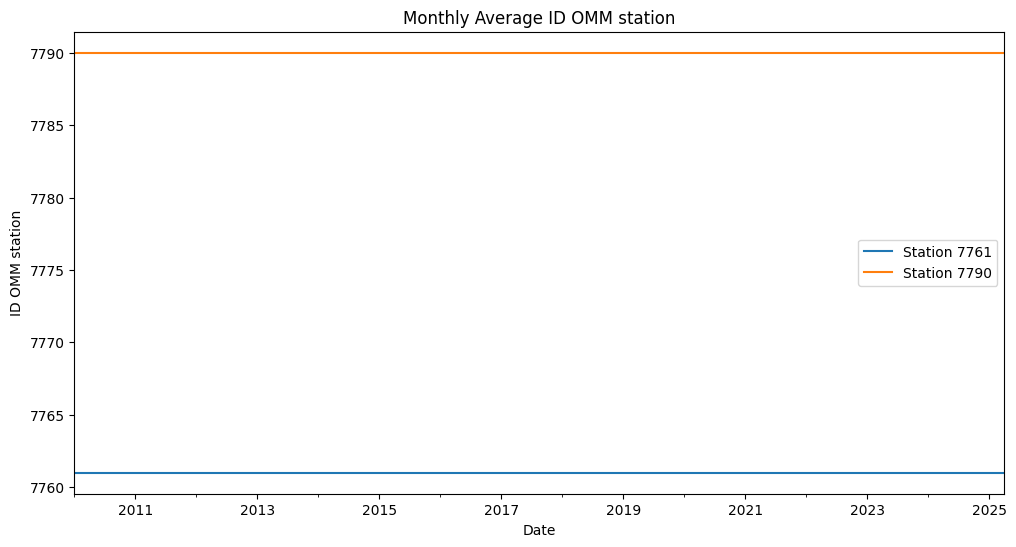

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


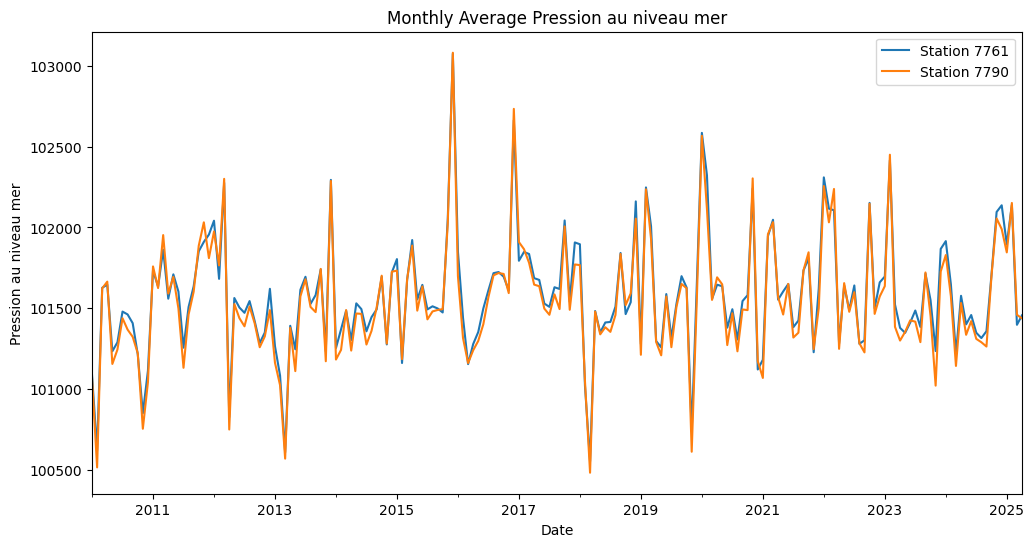

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


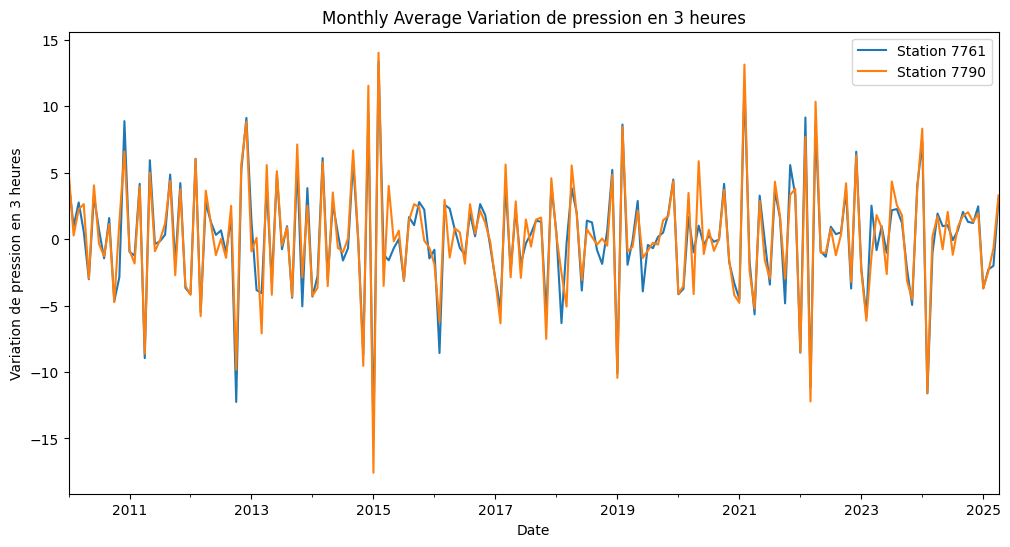

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


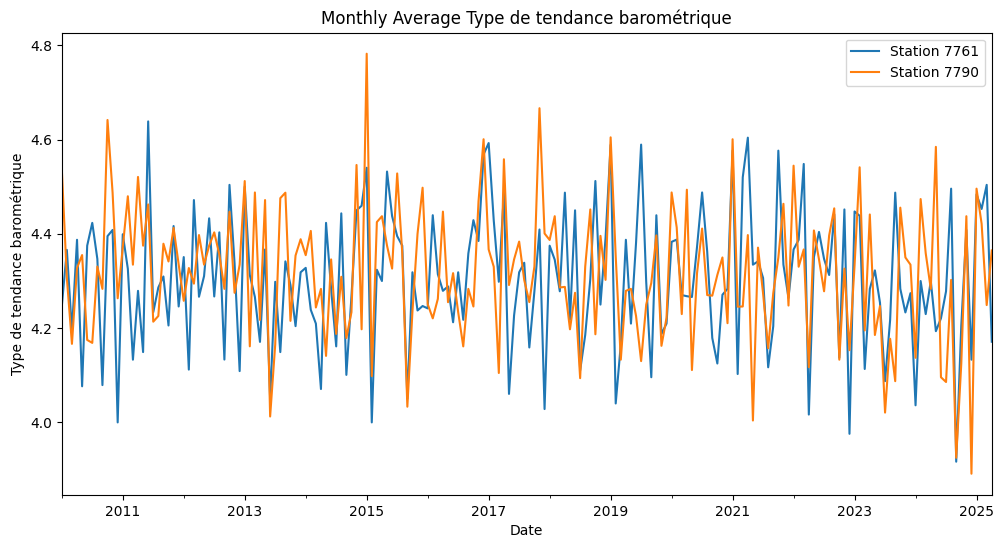

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


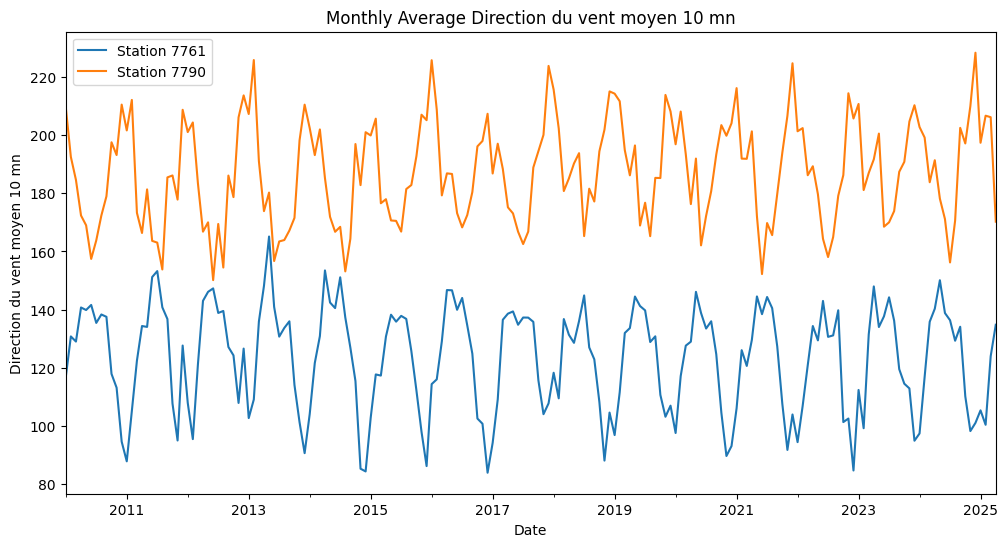

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


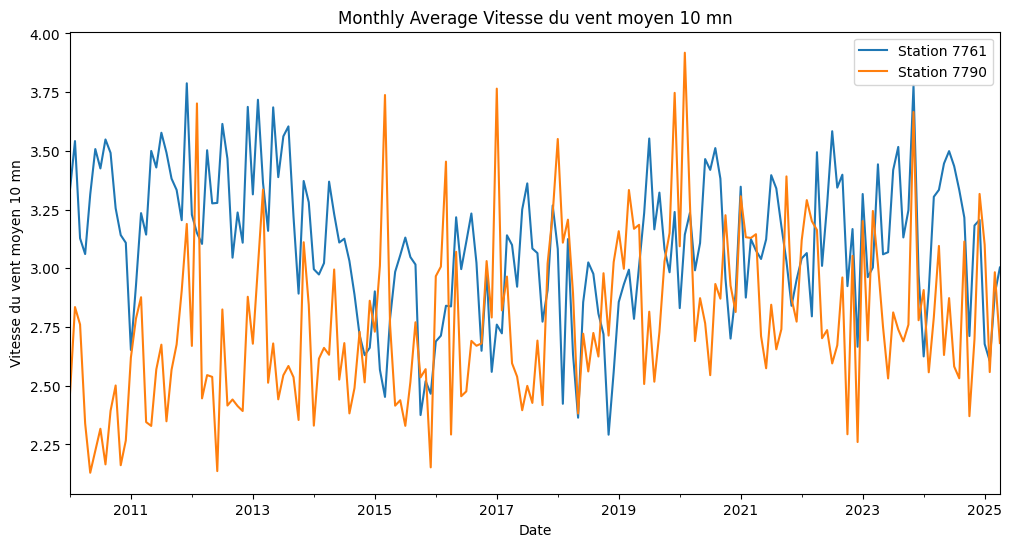

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


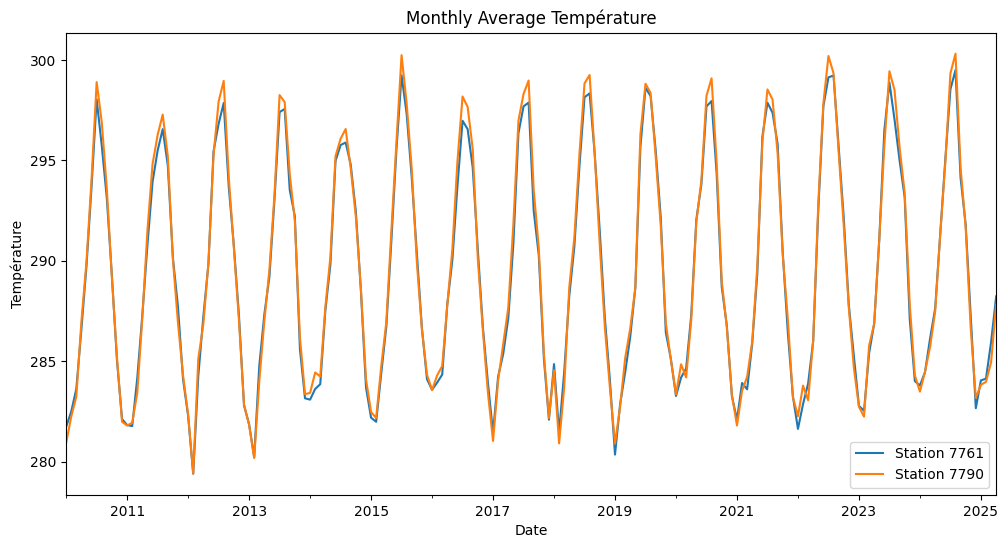

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


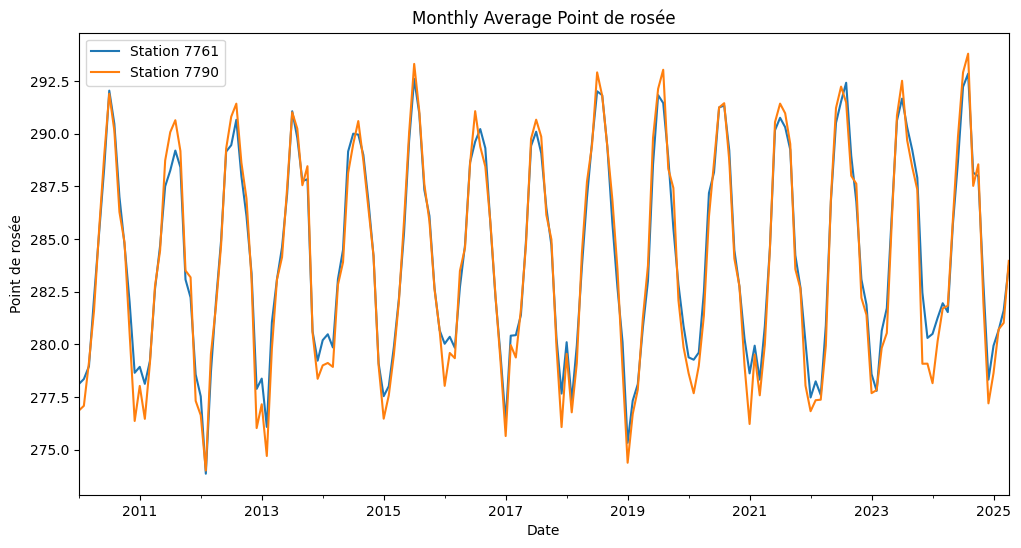

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


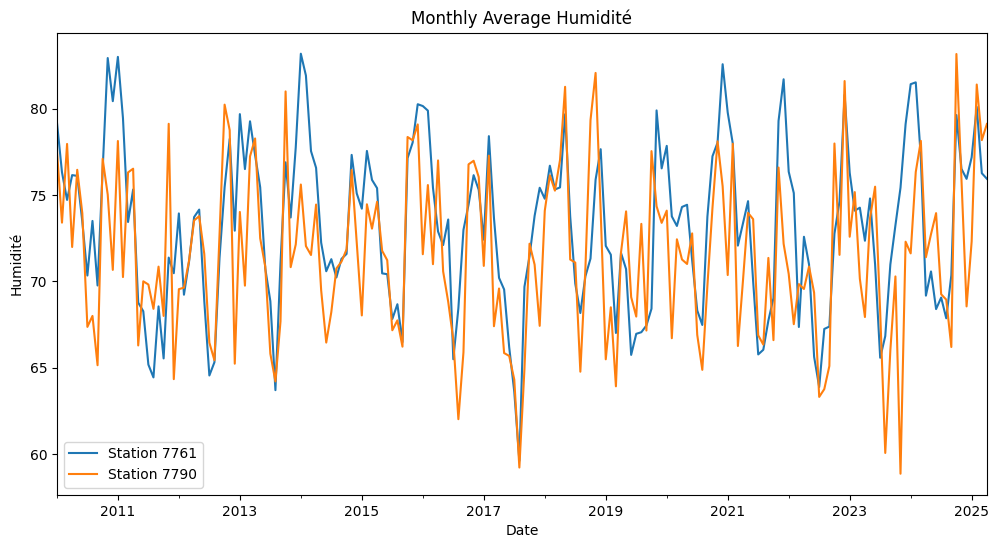

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


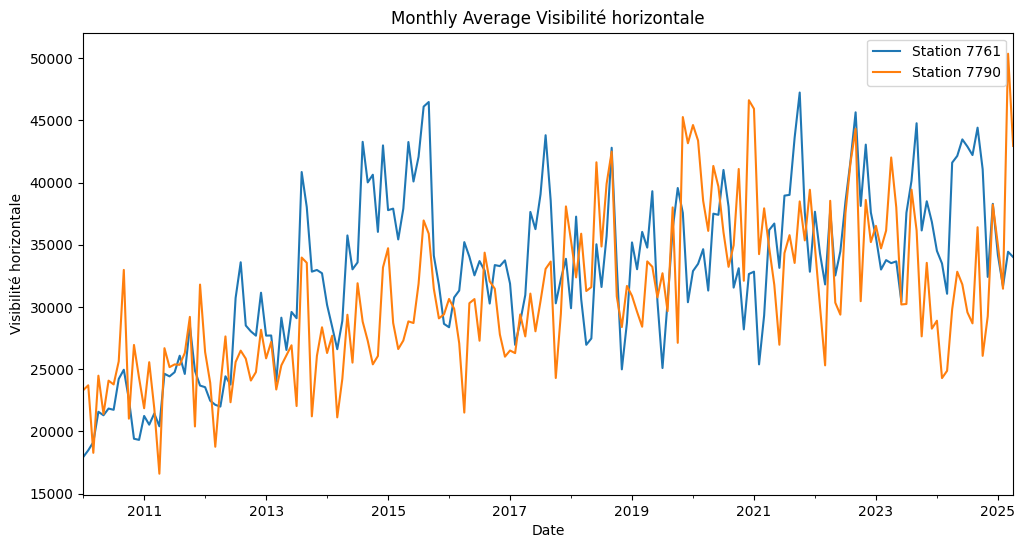

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


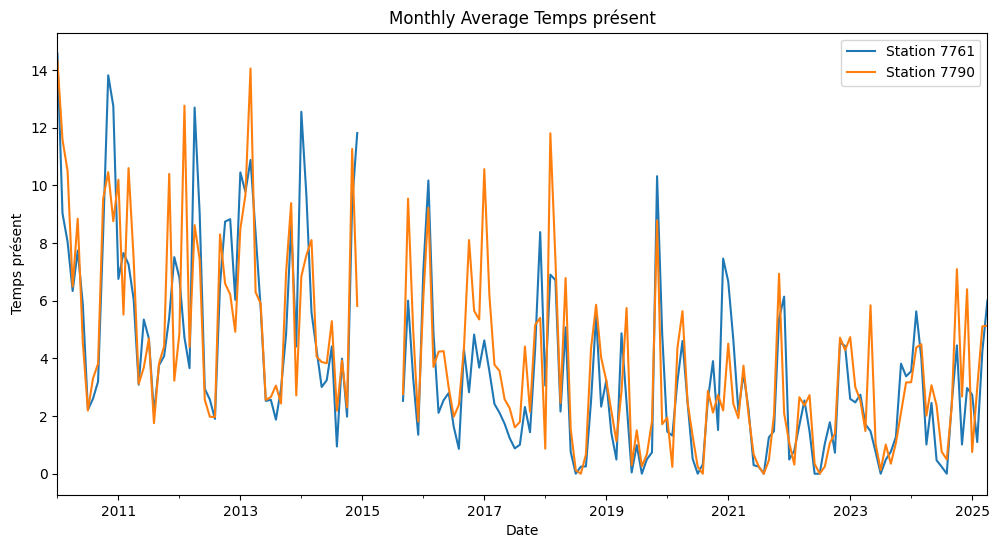

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


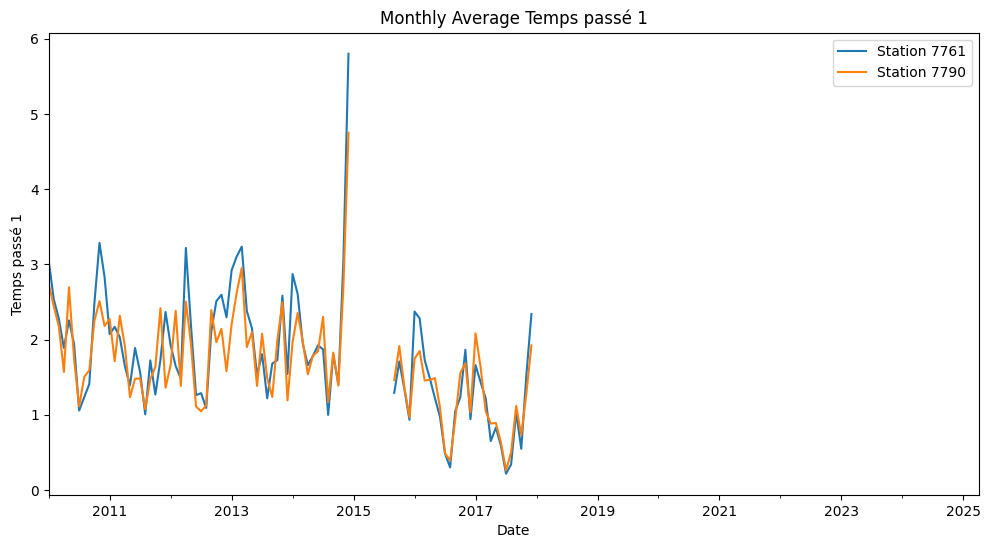

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


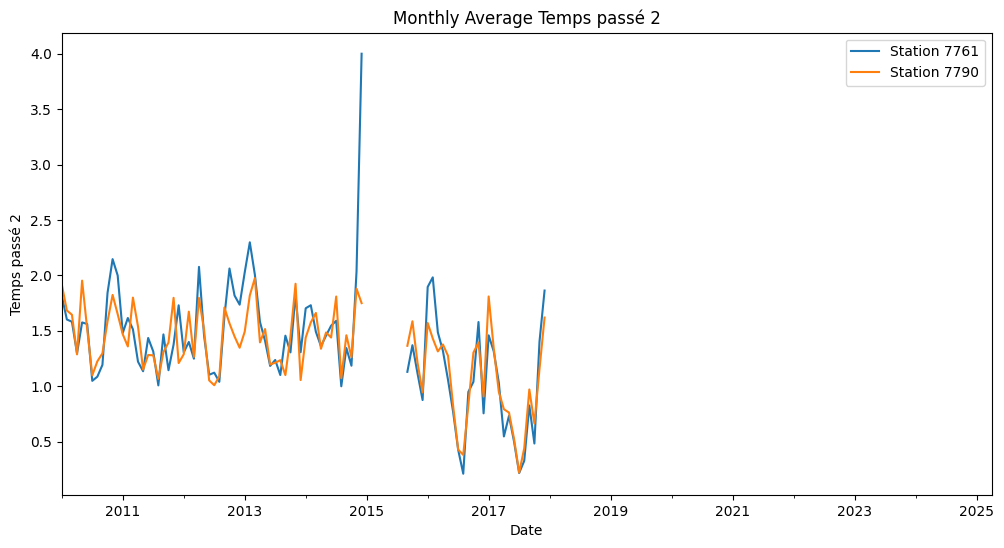

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


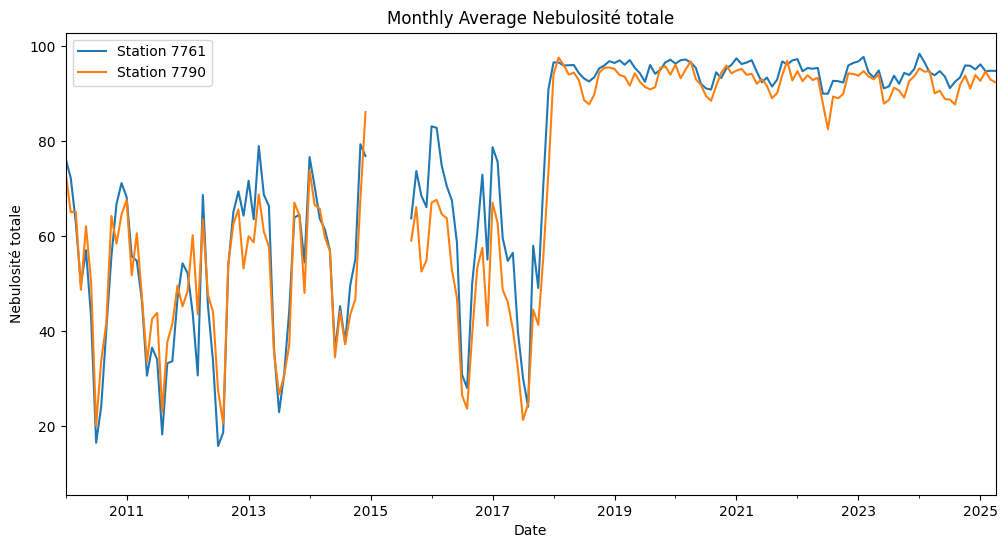

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


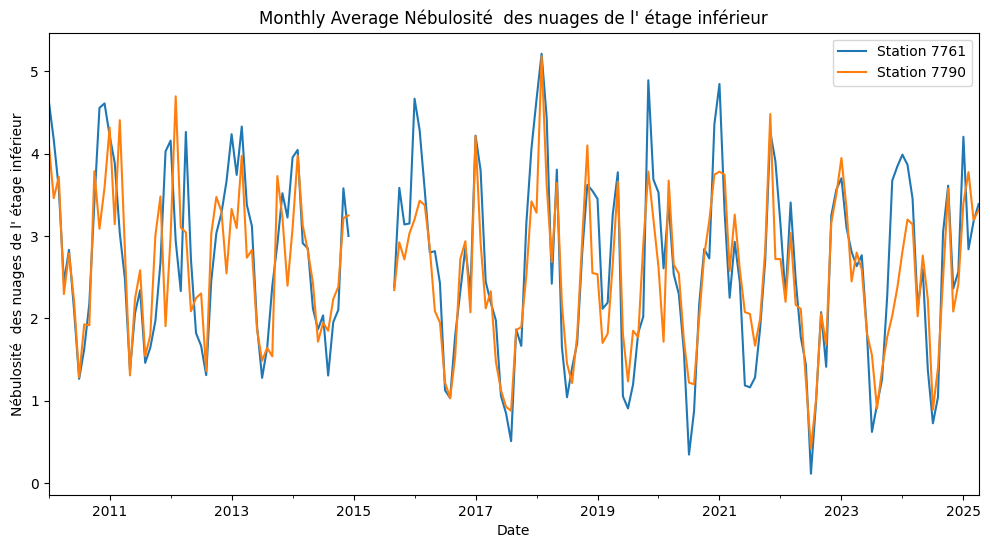

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


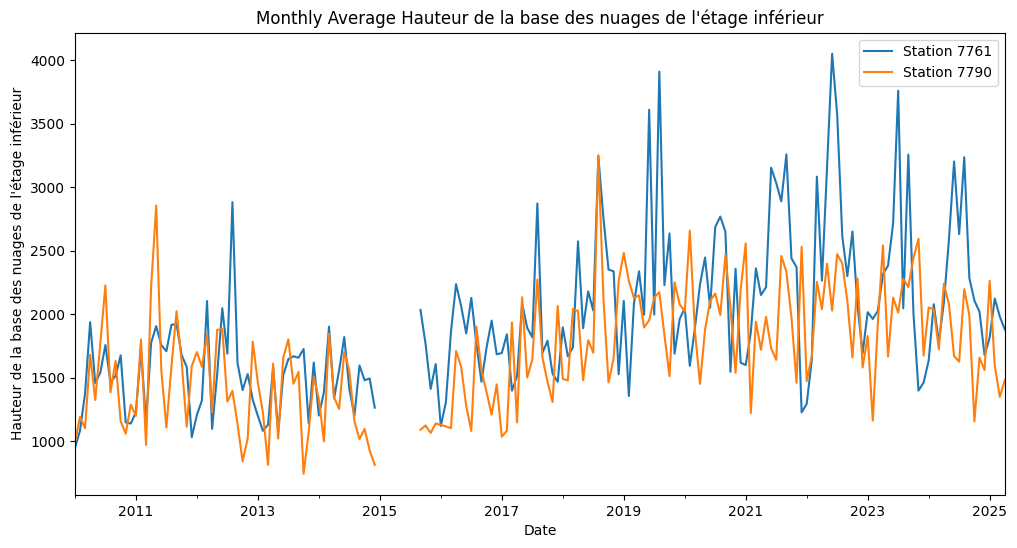

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


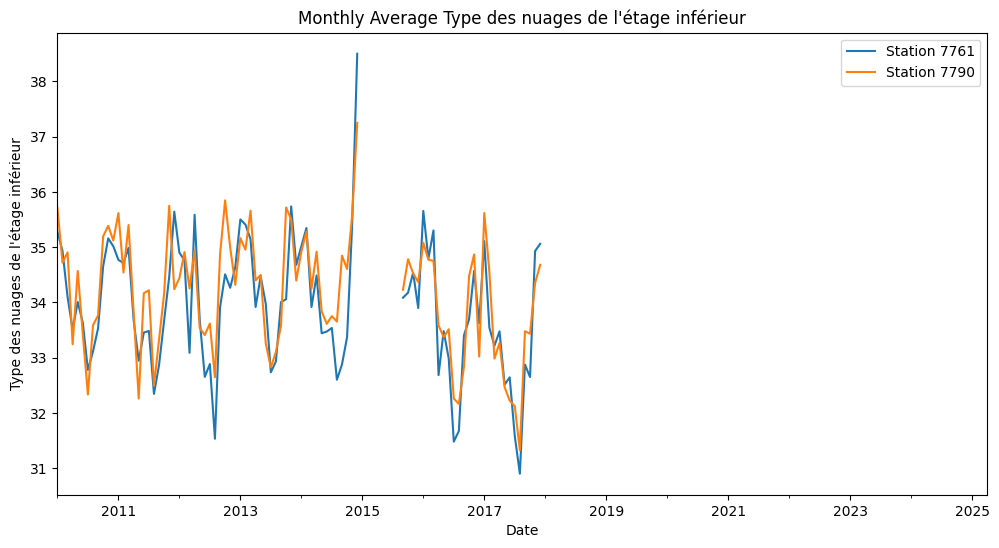

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


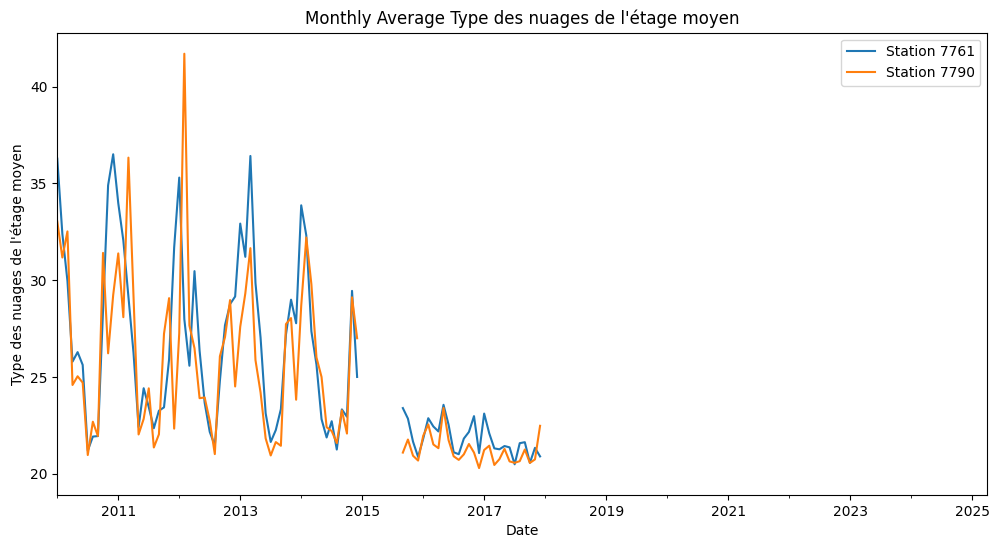

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


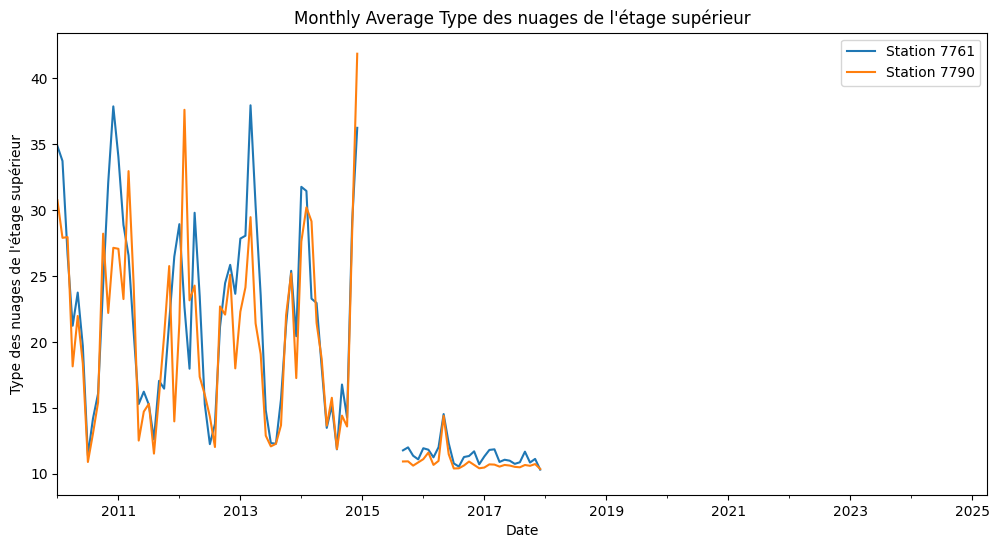

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


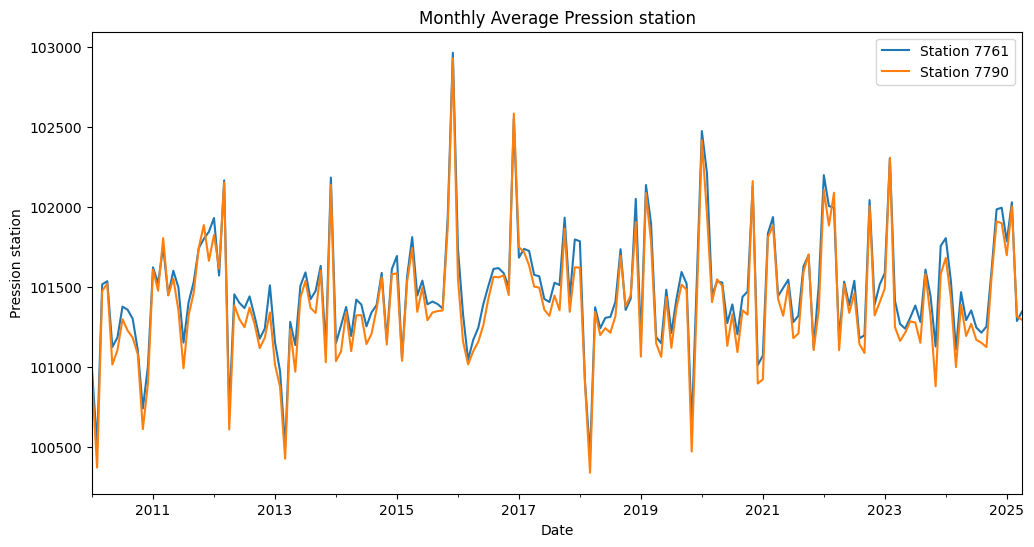

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


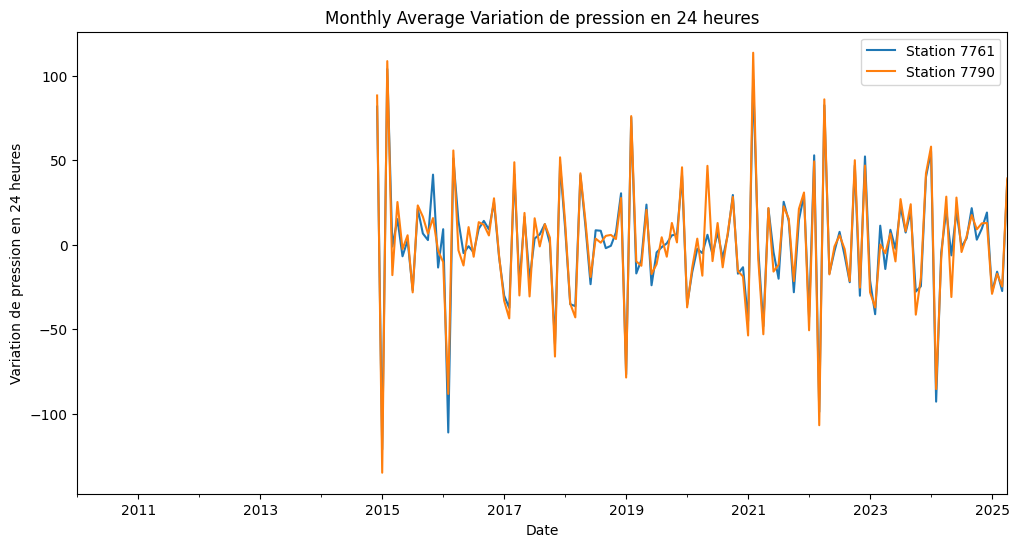

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


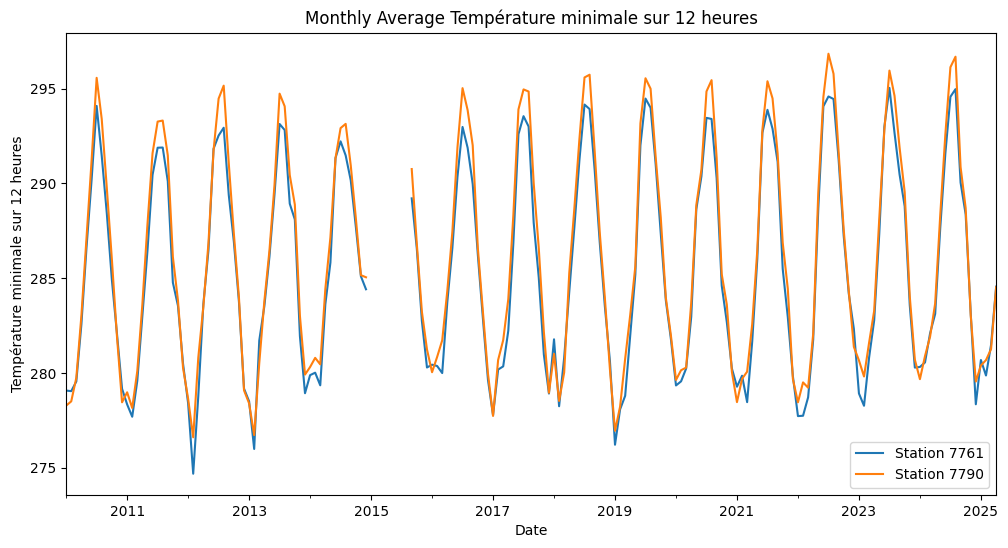

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


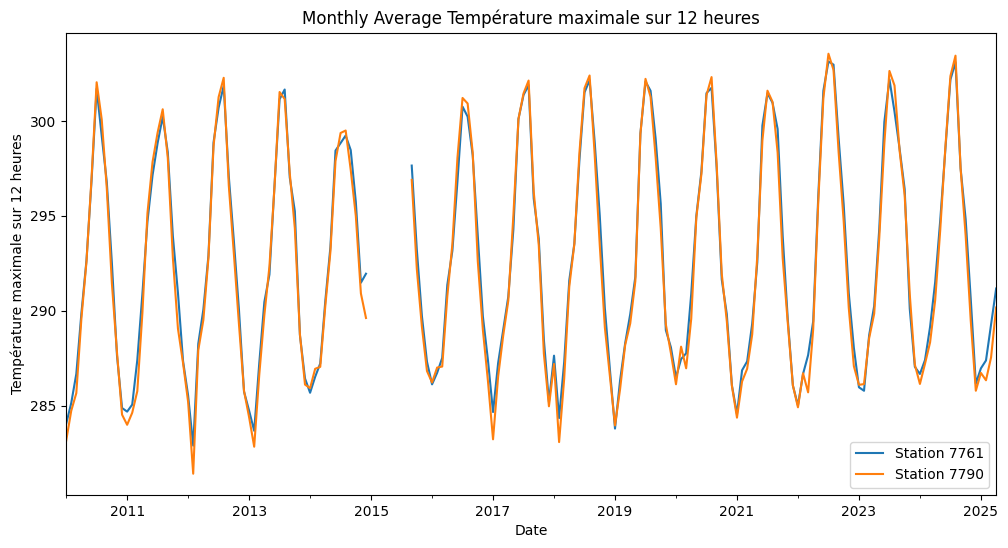

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


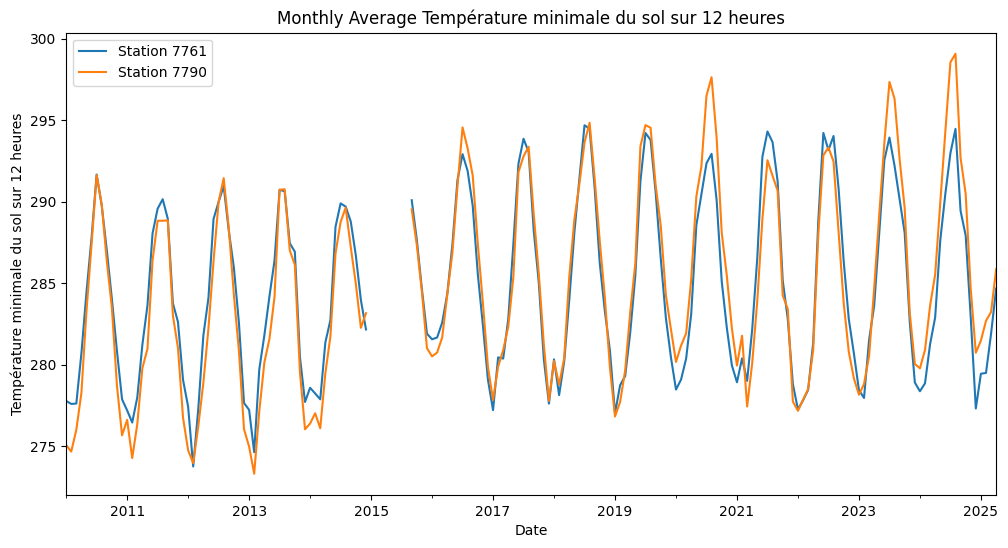

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


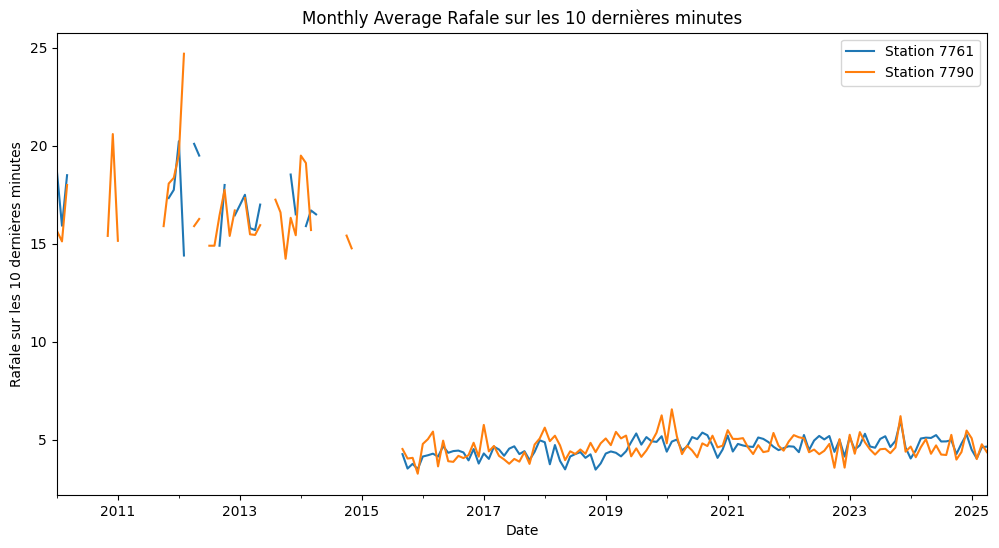

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


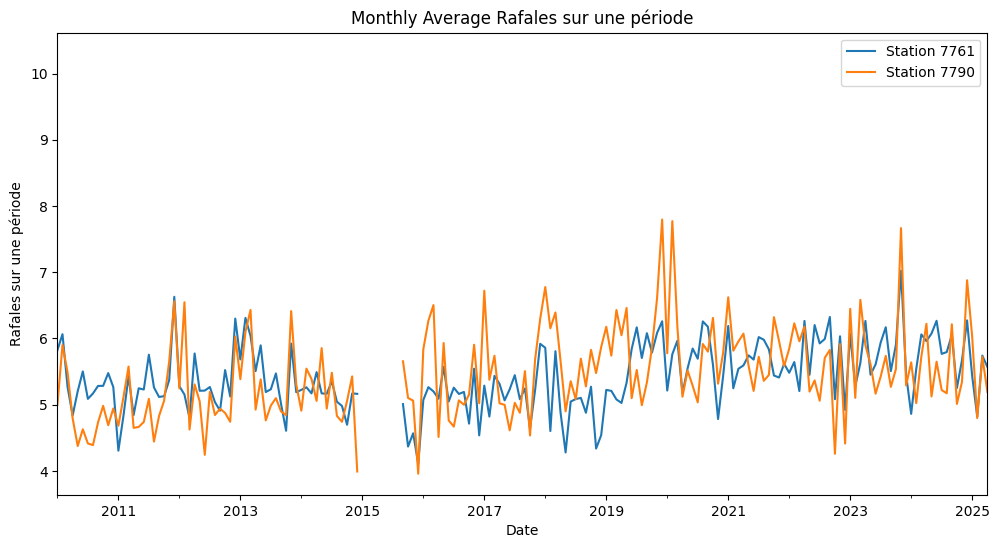

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


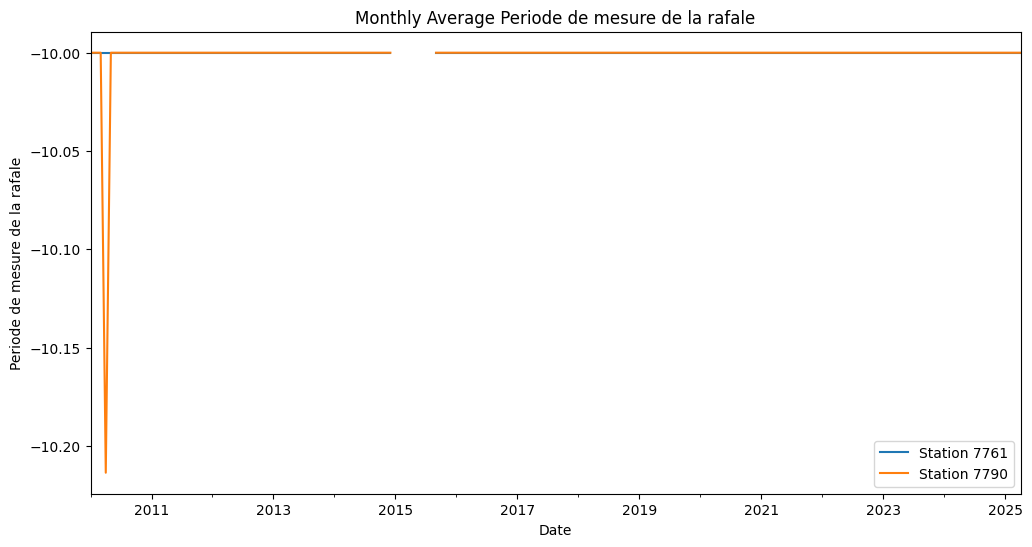

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


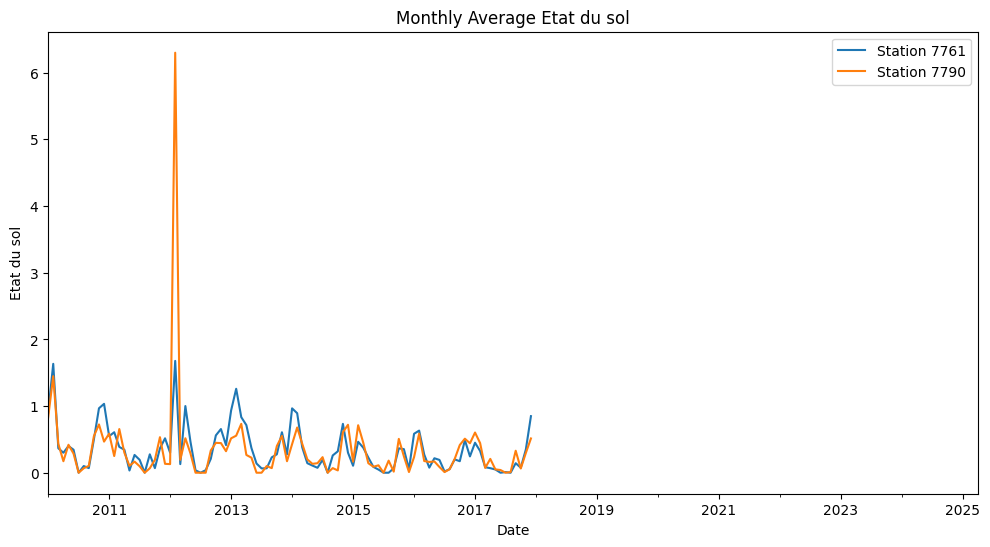

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


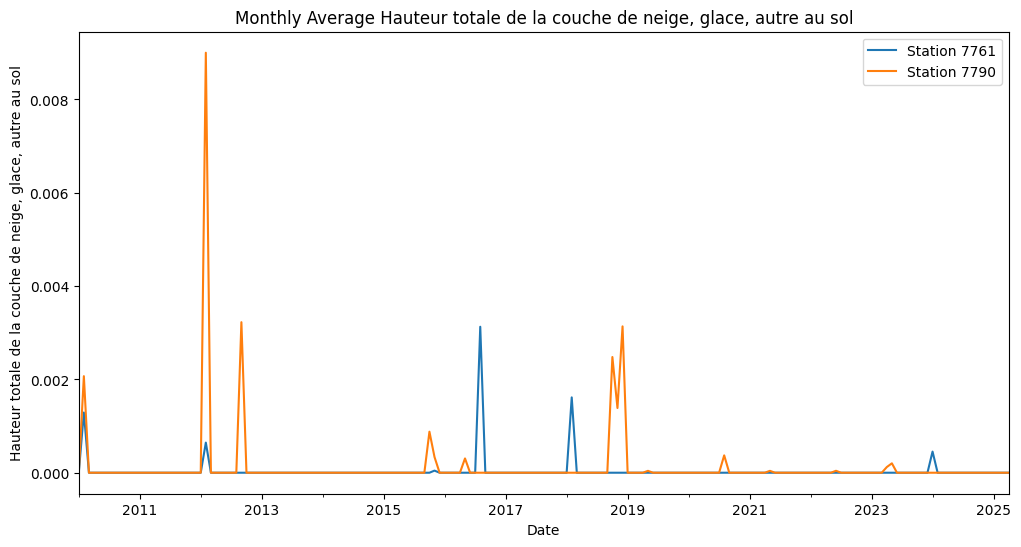

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


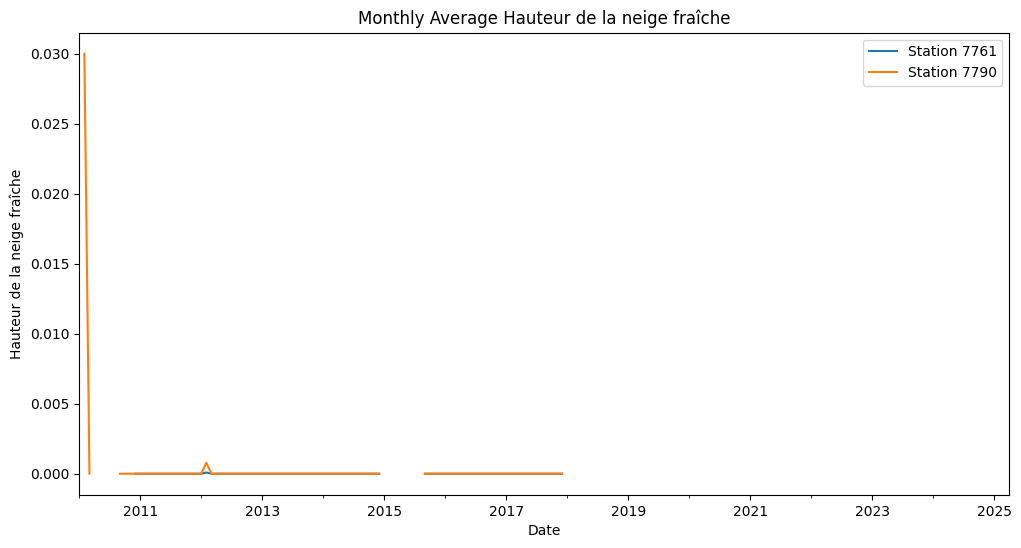

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


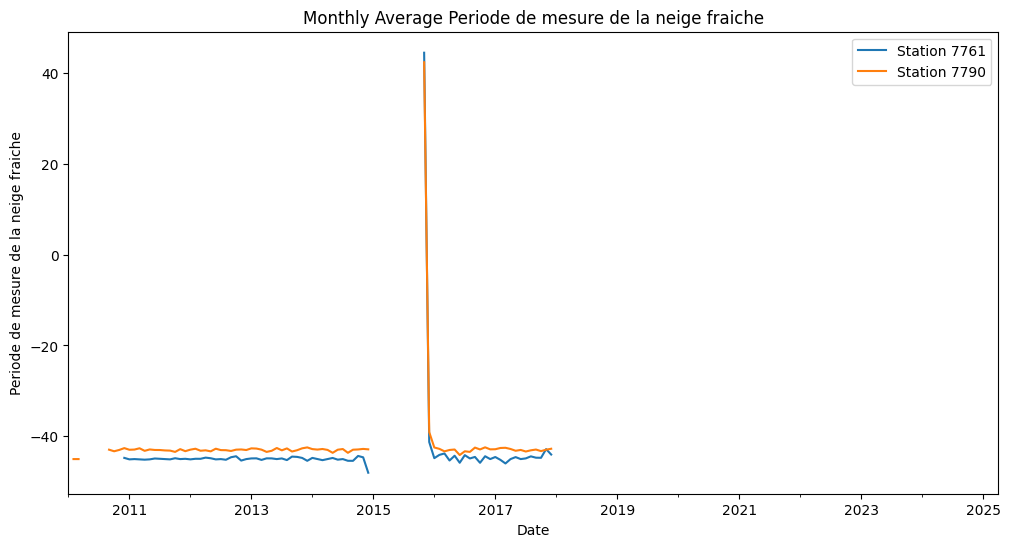

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


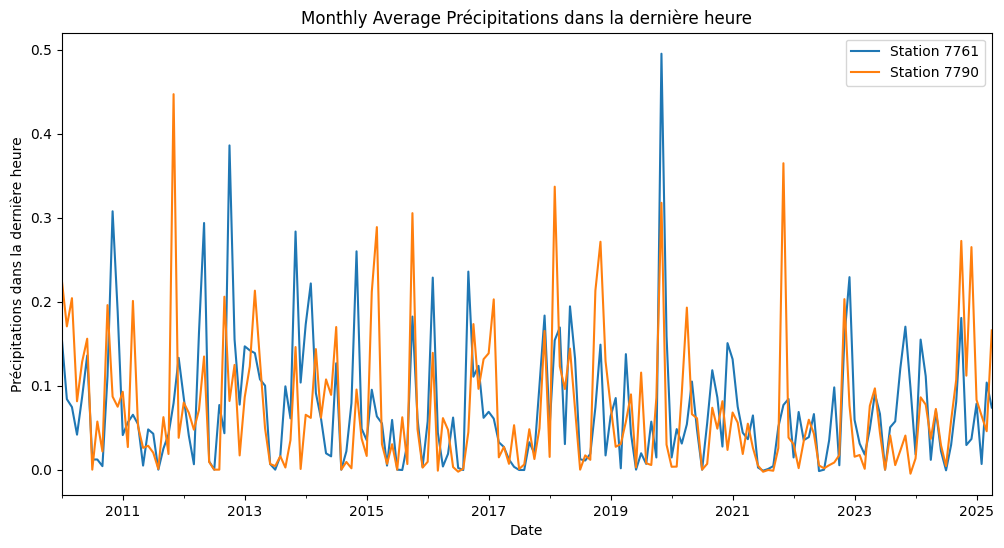

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


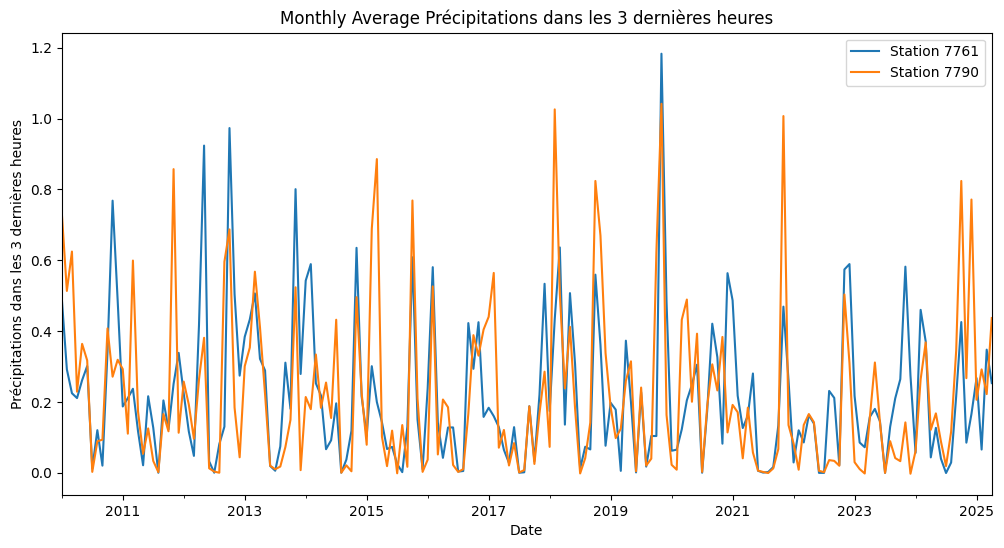

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


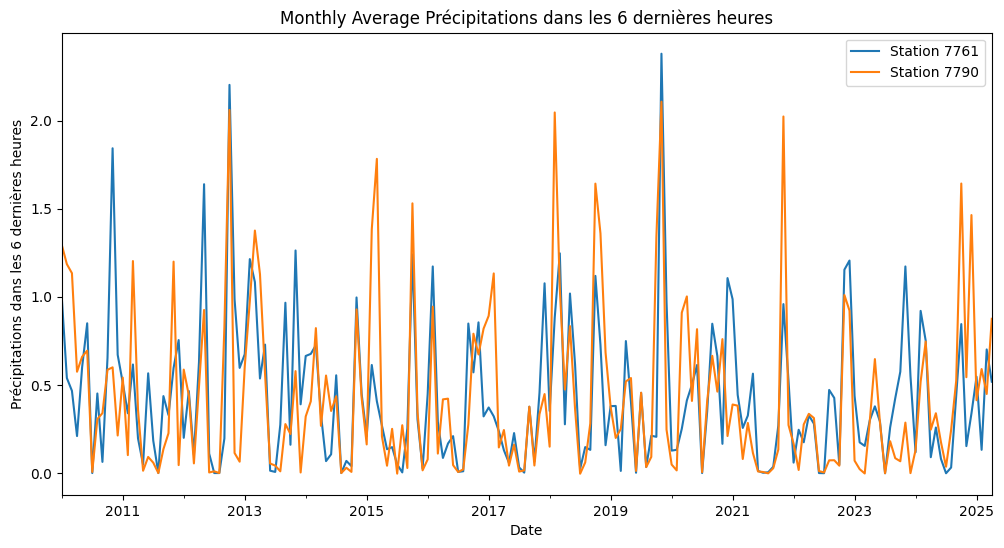

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


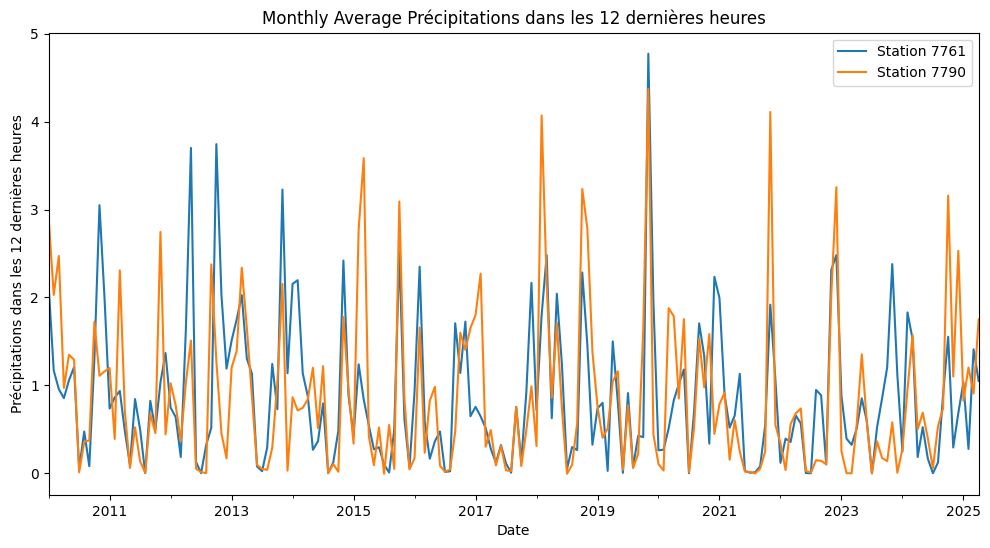

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


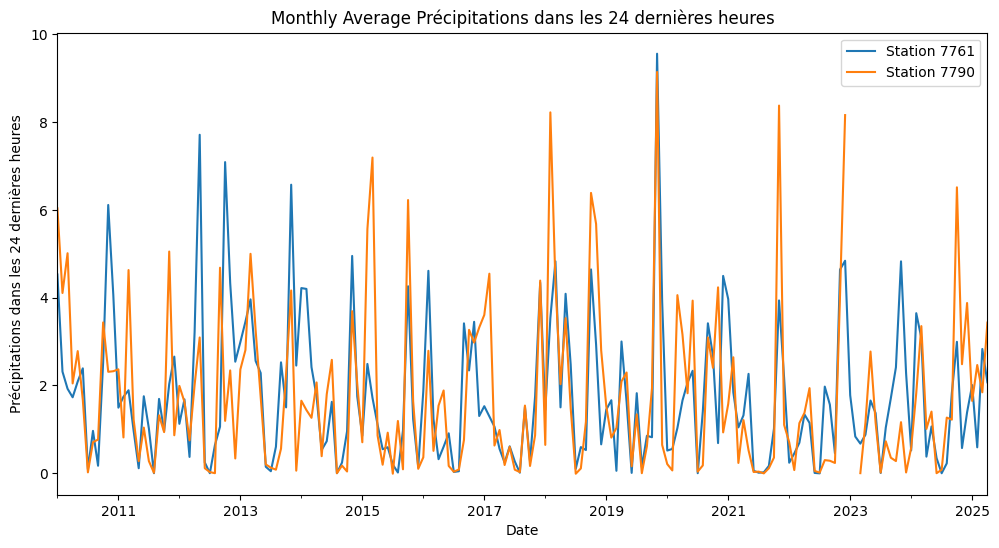

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


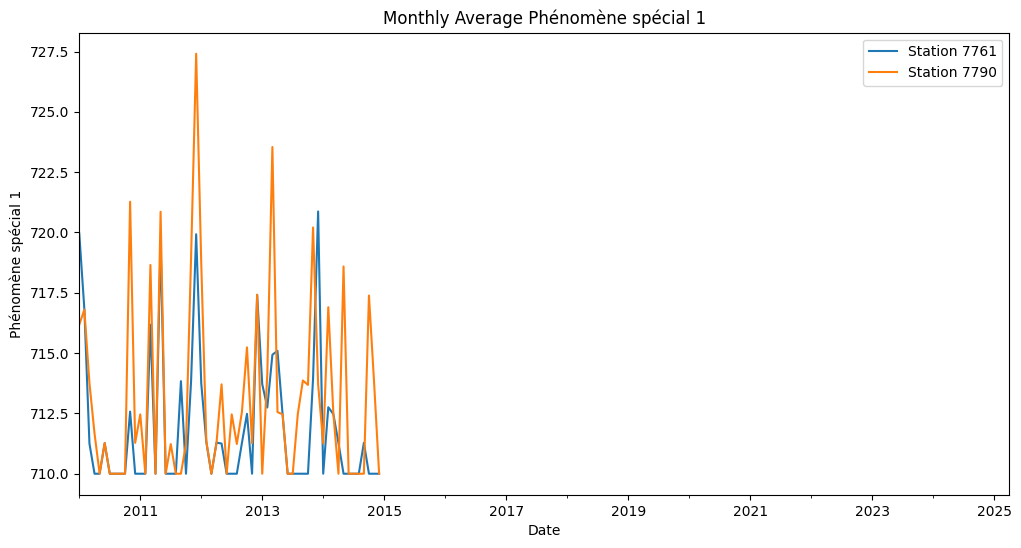

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


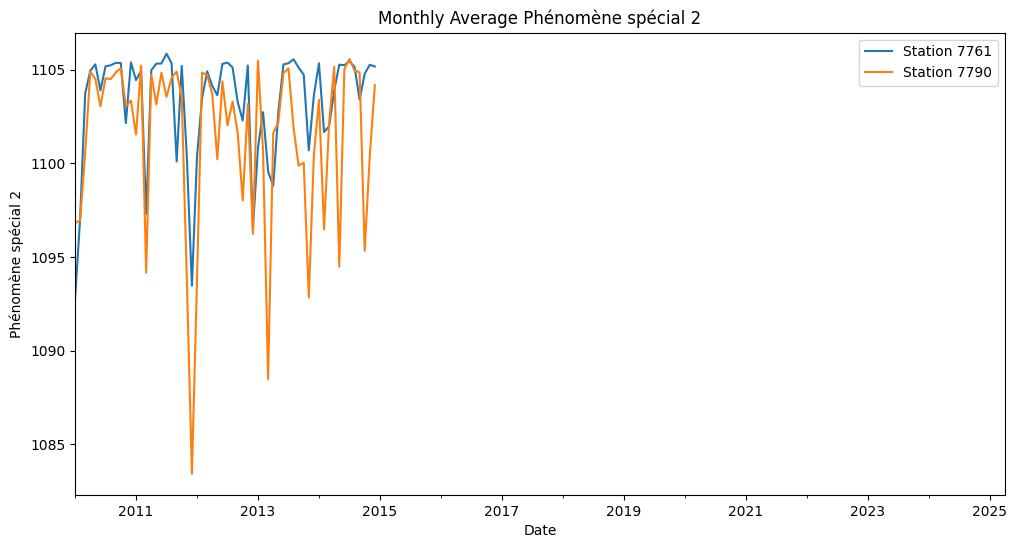

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


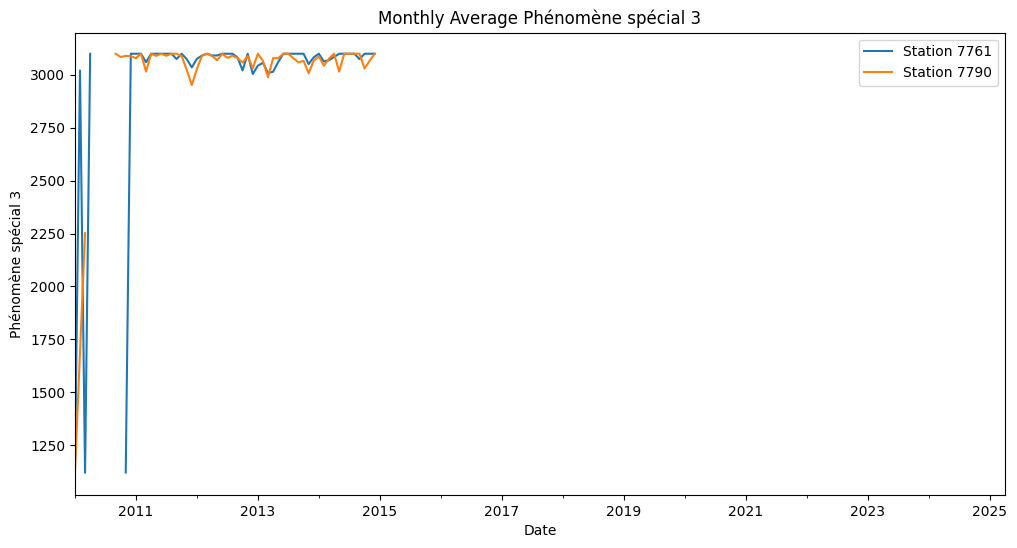

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


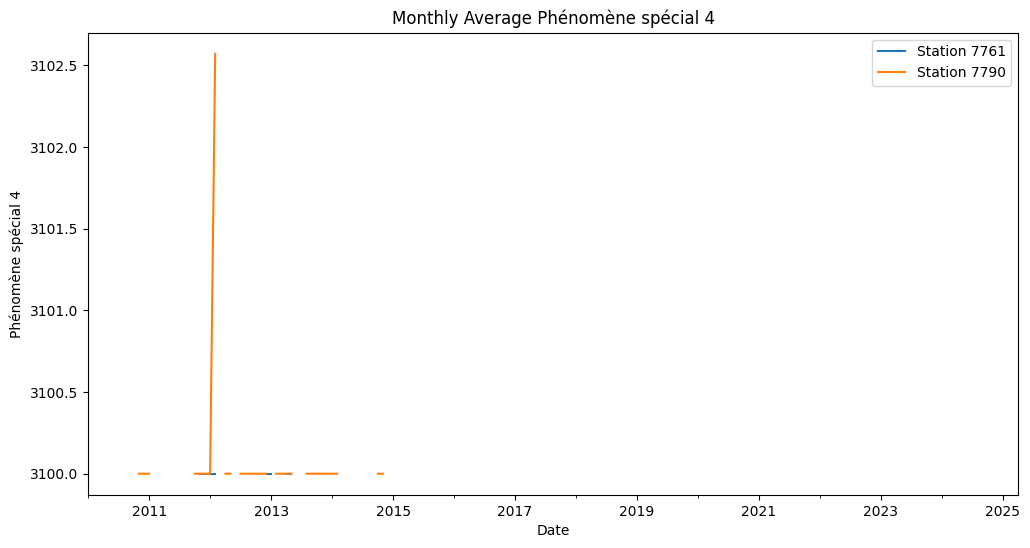

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


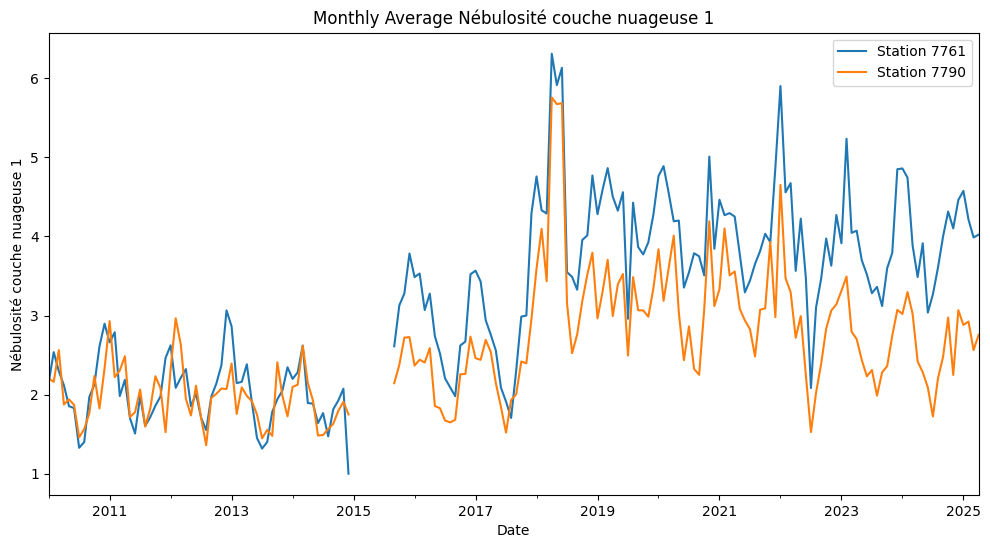

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


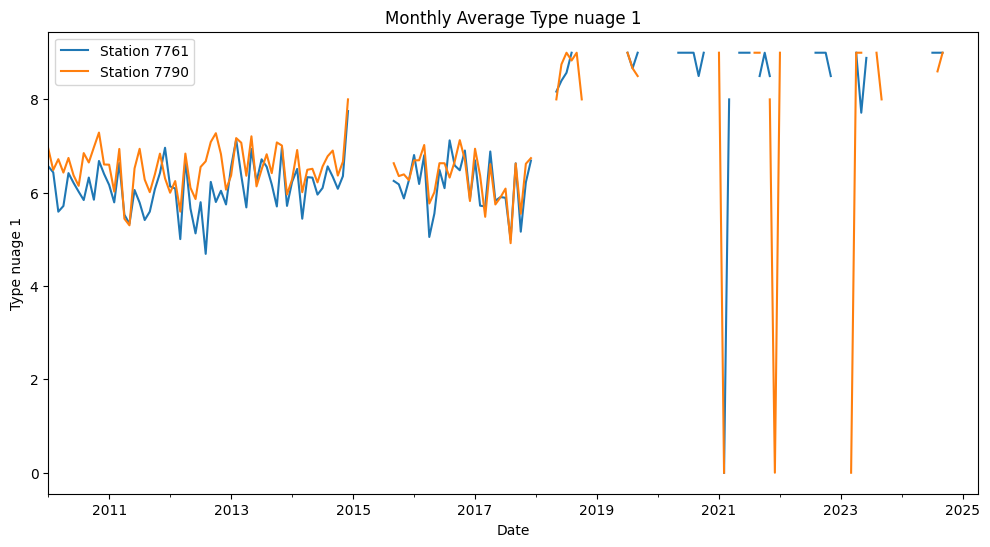

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


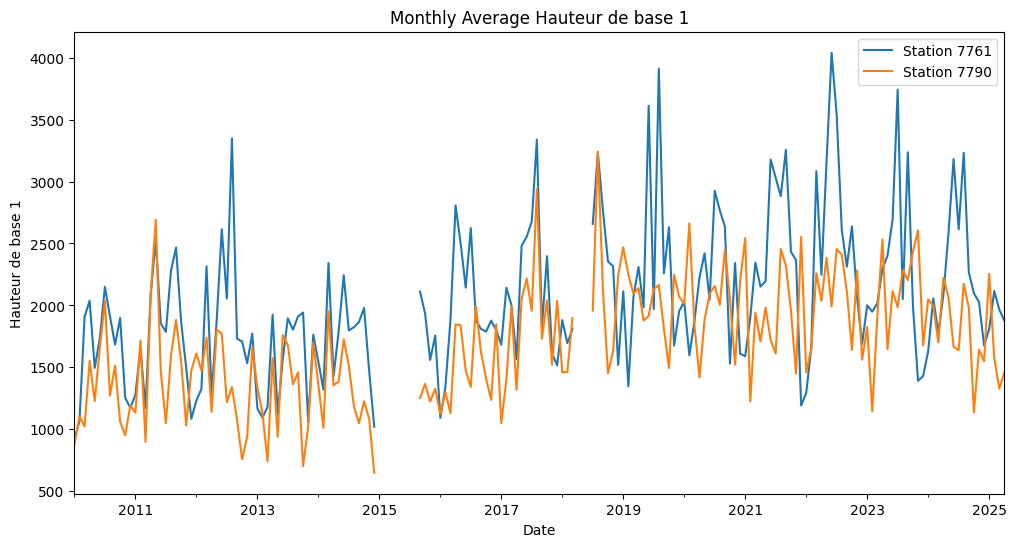

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


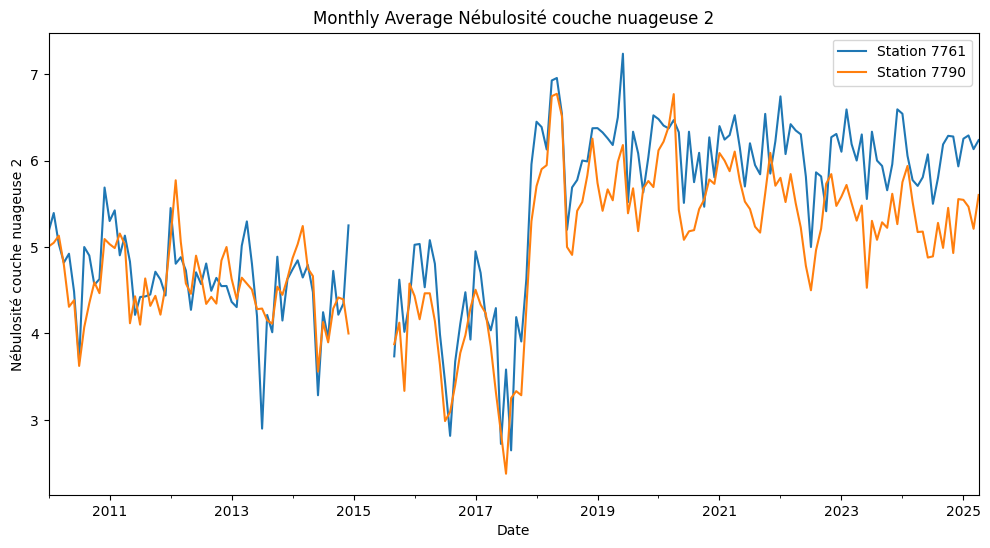

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


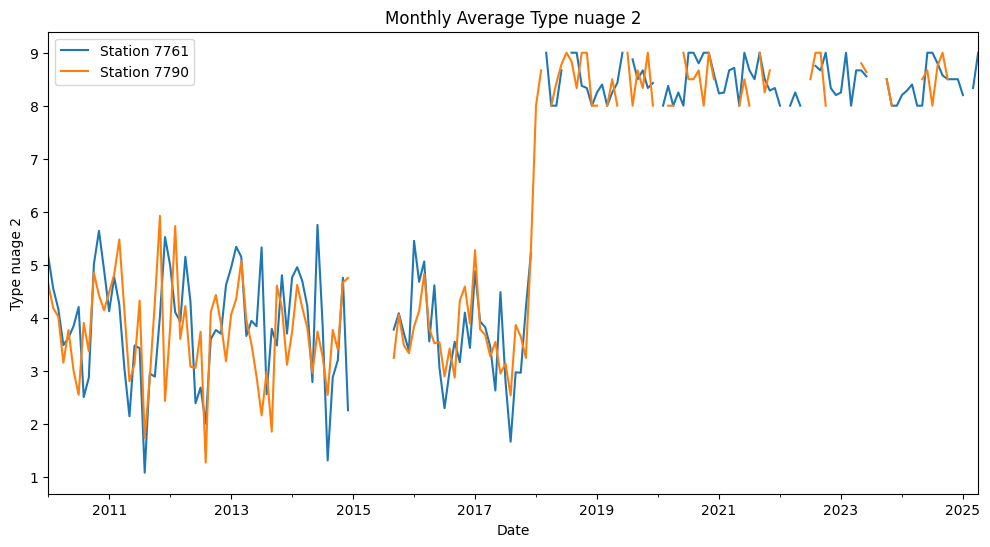

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


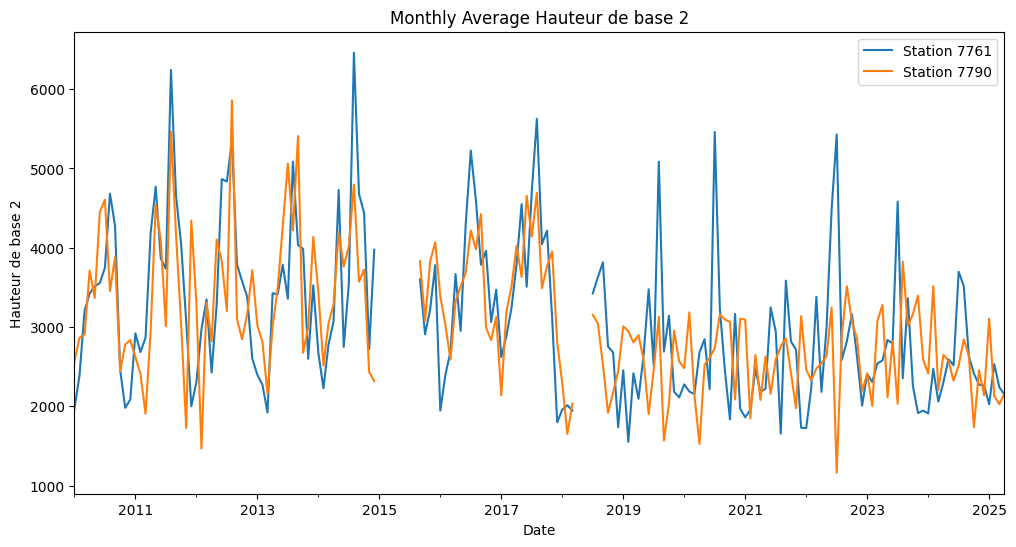

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


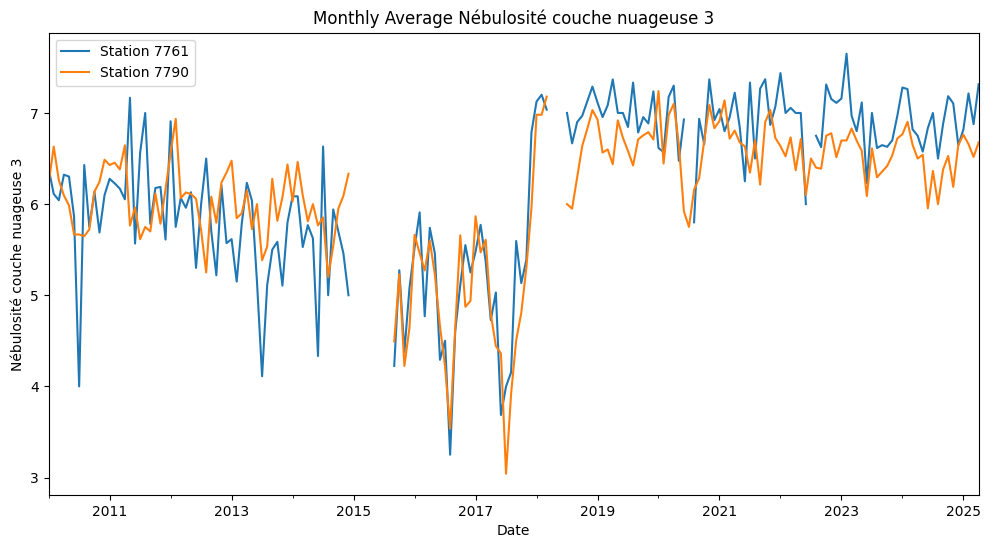

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


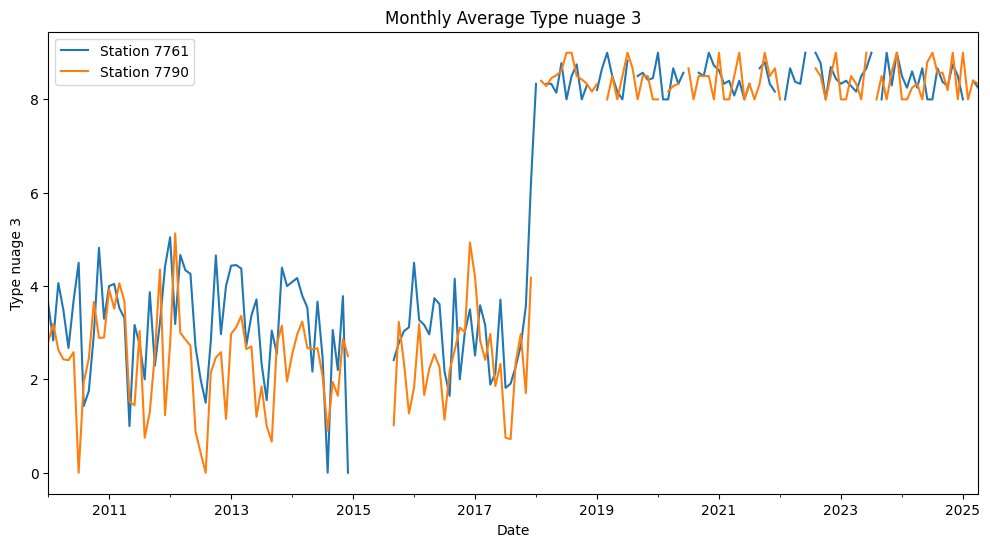

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


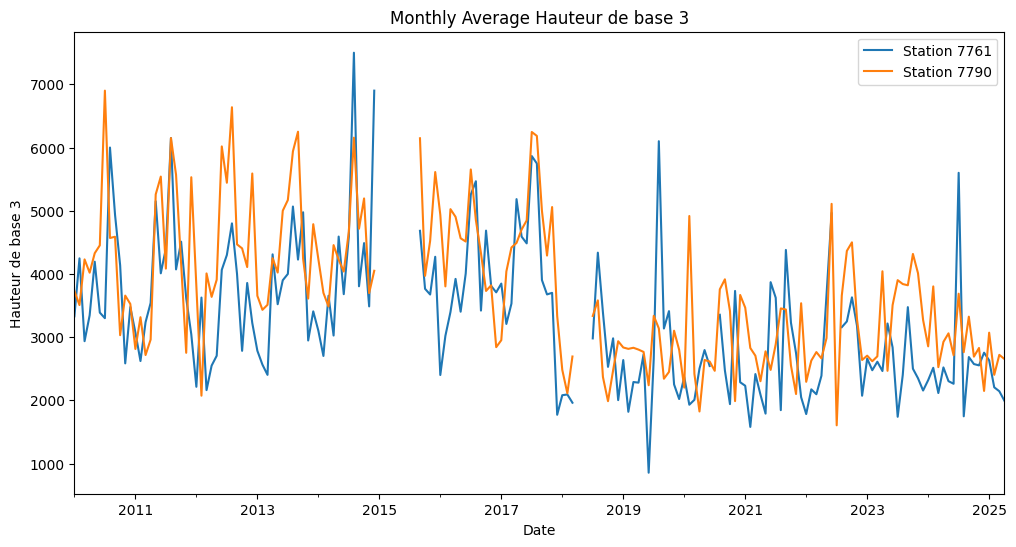

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


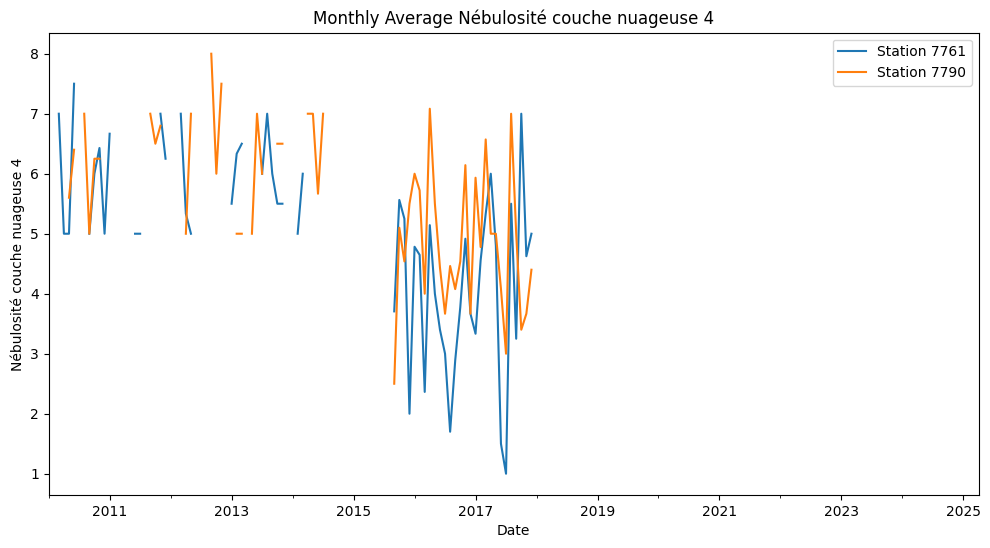

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


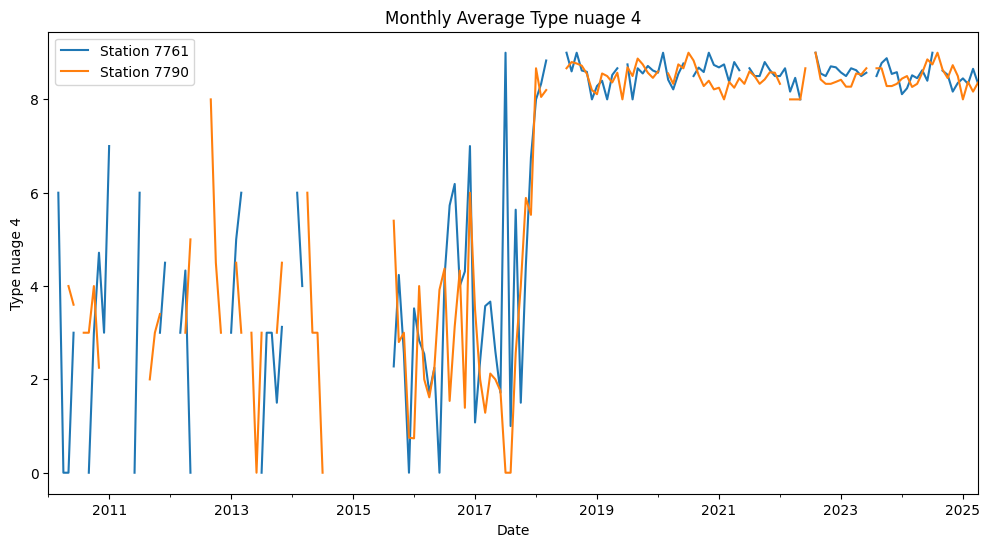

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


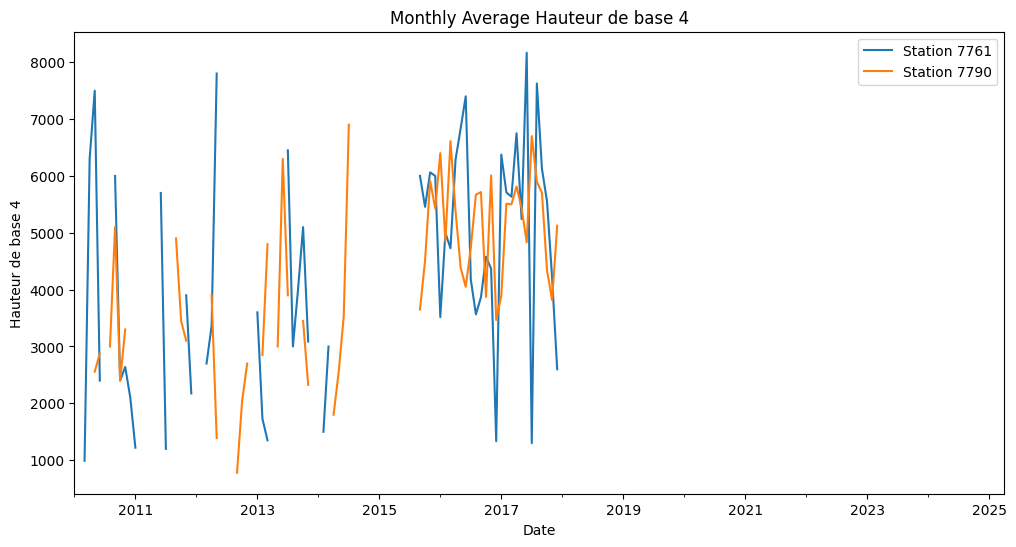

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


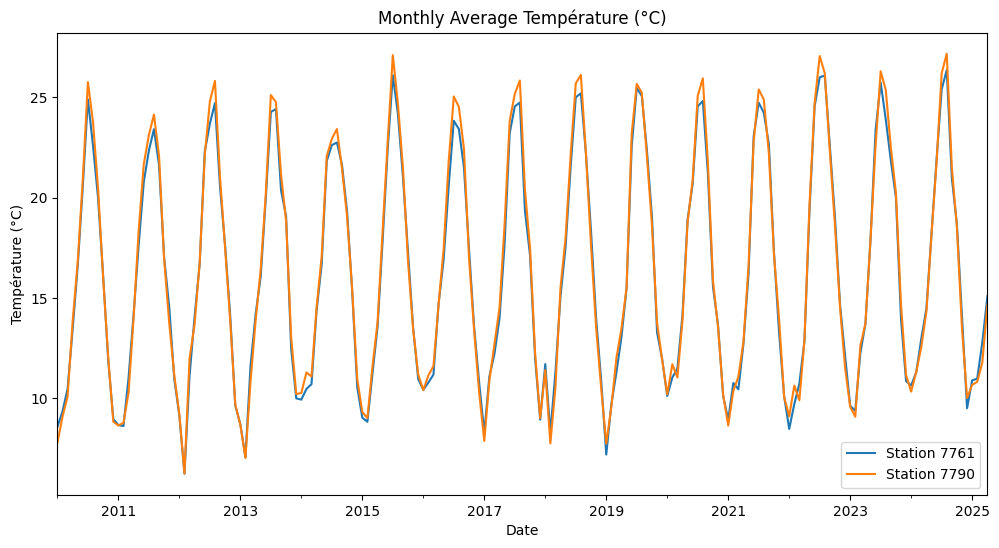

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


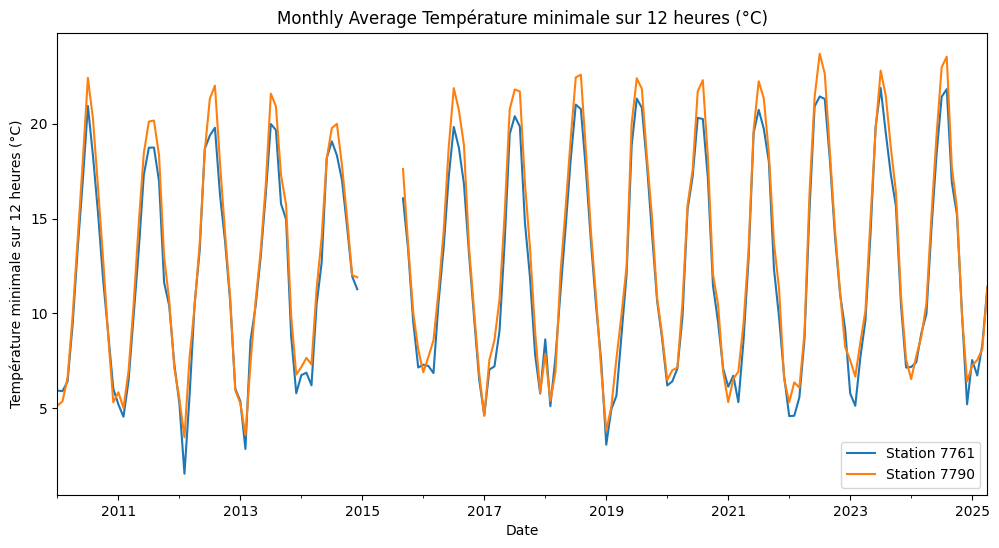

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


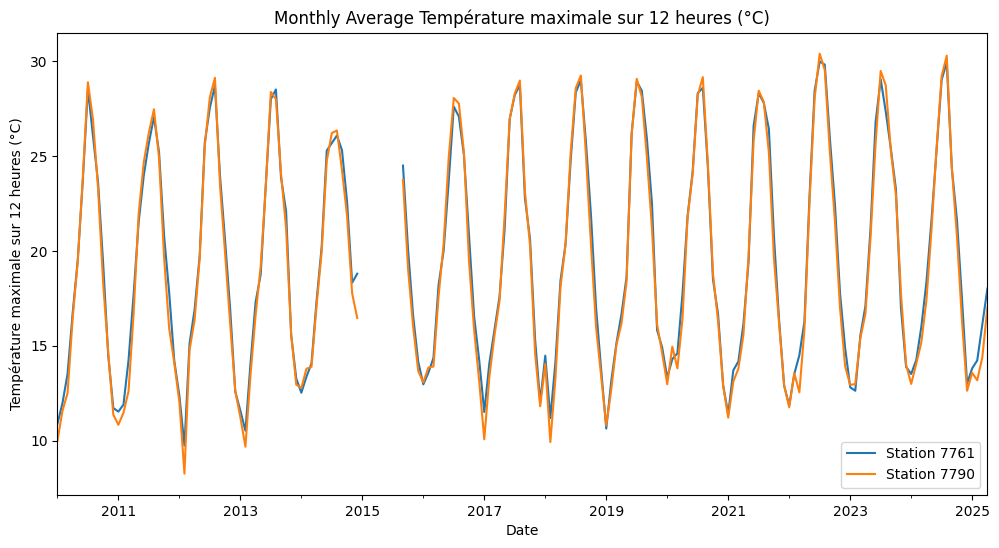

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


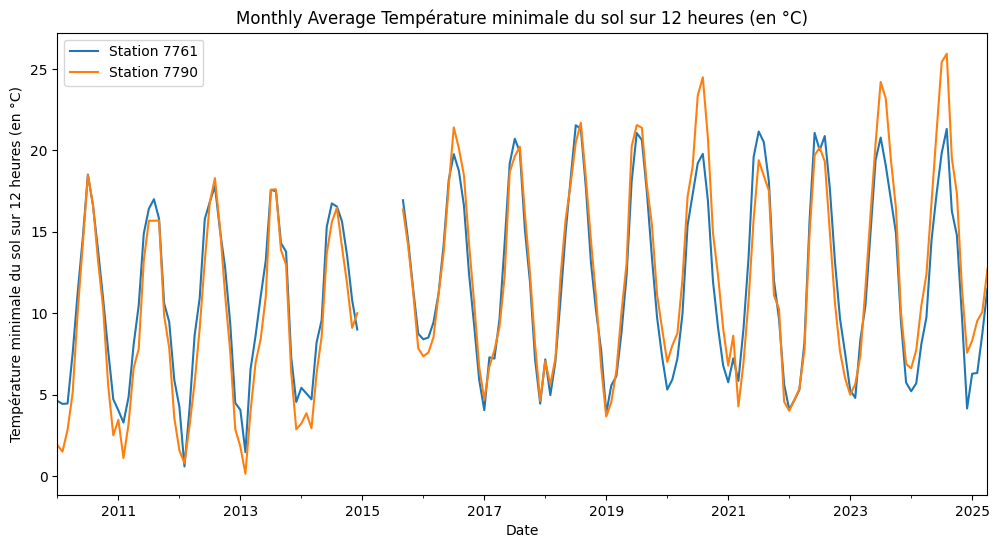

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


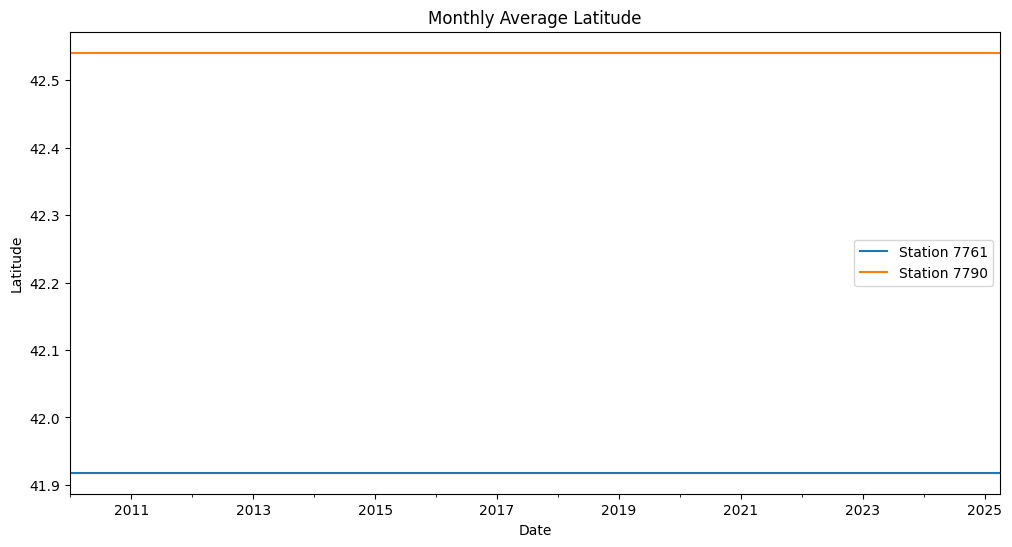

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


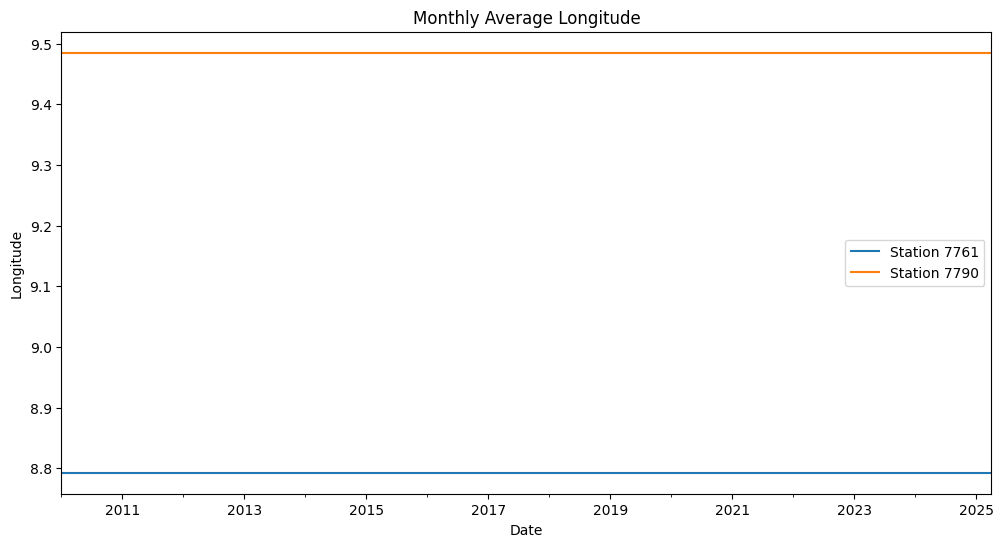

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


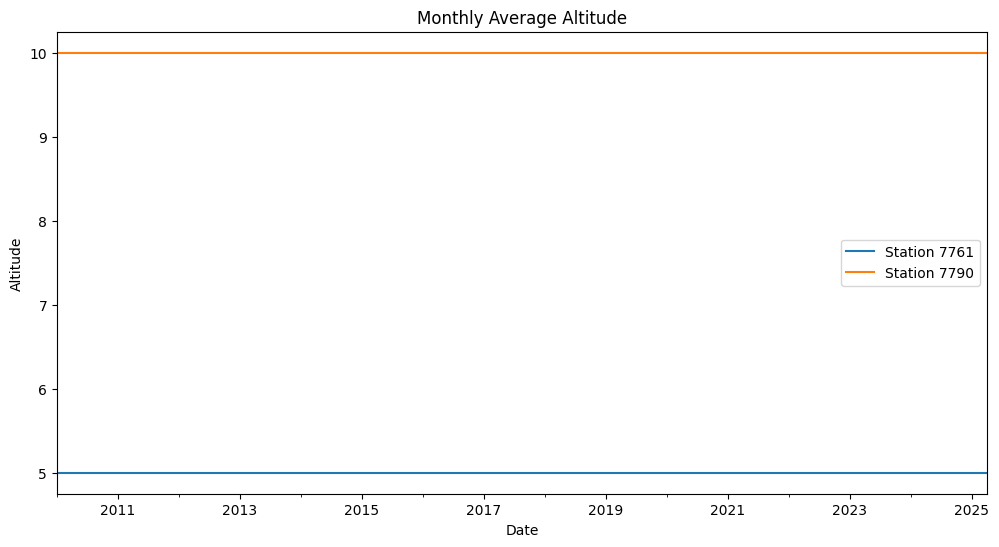

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


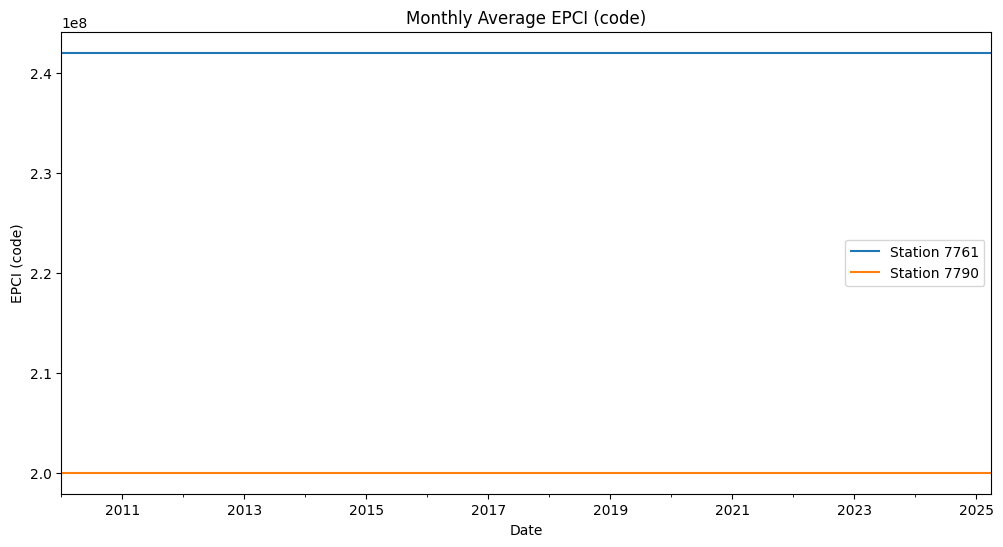

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


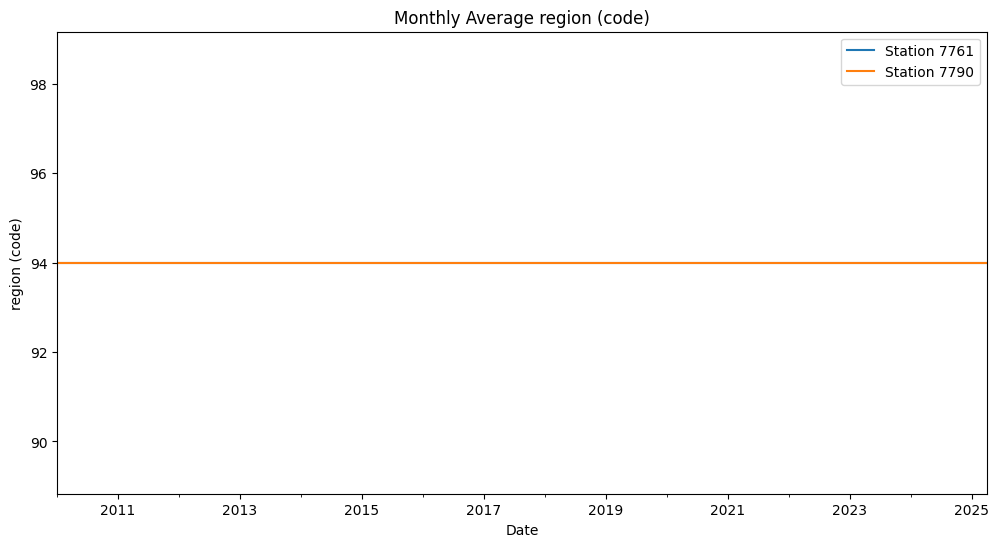

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/166790014.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


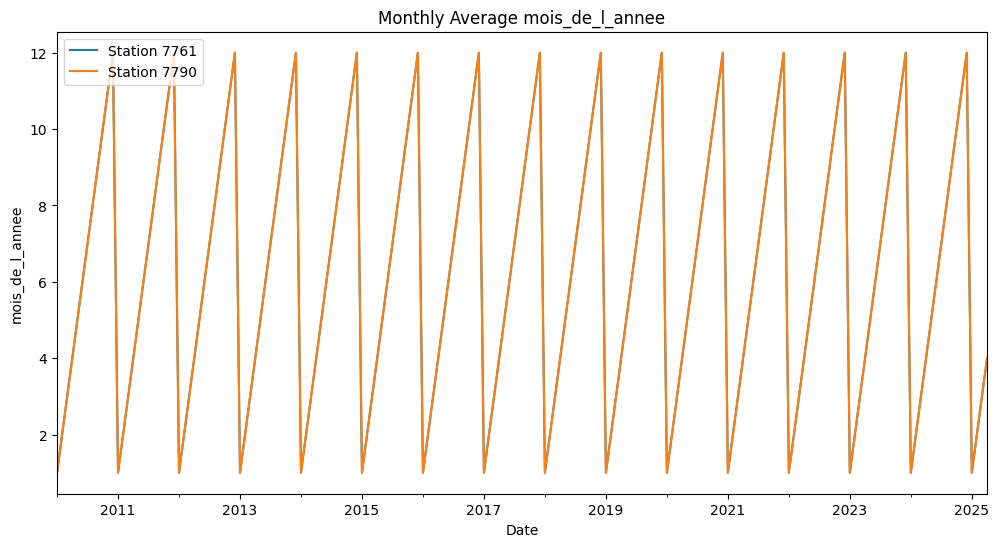

In [62]:
# List of numerical columns to compare
numerical_cols = df.select_dtypes(include=['number']).columns

# Iterate through the numerical columns and create plots
for col in numerical_cols:
  # Calculate monthly averages for both stations
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()

  # Create a figure and axes
  fig, ax = plt.subplots(figsize=(12, 6))

  # Plot the monthly averages
  monthly_avg_7761.plot(ax=ax, label='Station 7761')
  monthly_avg_7790.plot(ax=ax, label='Station 7790')

  # Set the title and labels
  ax.set_title(f'Monthly Average {col}')
  ax.set_xlabel('Date')
  ax.set_ylabel(col)
  ax.legend()

  # Display the plot
  plt.savefig(f"NumericalColumnsStationComparison/{col}.png")
  plt.show()

In [63]:
df_7761.head()

index  ID OMM station                Date  Pression au niveau mer  \
0      0            7761 2010-01-05 19:00:00                 99490.0   
1      6            7761 2010-04-28 02:00:00                102210.0   
2      9            7761 2010-04-27 02:00:00                101990.0   
3     11            7761 2010-04-25 14:00:00                102150.0   
4     12            7761 2010-03-22 19:00:00                101850.0   

   Variation de pression en 3 heures  Type de tendance barométrique  \
0                             -100.0                            7.0   
1                               50.0                            1.0   
2                             -100.0                            8.0   
3                               40.0                            1.0   
4                                0.0                            5.0   

   Direction du vent moyen 10 mn  Vitesse du vent moyen 10 mn  Température  \
0                           60.0                          1.5       285.05   
1                           50.0                          2.6       285.65   
2                           40.0                          2.6       285.65   
3                          220.0                          4.1       291.75   
4                          210.0                          0.5       286.65   

   Point de rosée  ...  Altitude  communes (name)  communes (code)  \
0          284.15  ...         5          Ajaccio            2a004   
1          284.75  ...         5          Ajaccio            2a004   
2          284.55  ...         5          Ajaccio            2a004   
3          287.85  ...         5          Ajaccio            2a004   
4          285.35  ...         5          Ajaccio            2a004   

           EPCI (name)  EPCI (code)  department (name)  department (code)  \
0  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
1  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
2  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
3  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
4  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   

   region (name)  region (code)  mois_de_l_annee  
0          Corse             94                1  
1          Corse             94                4  
2          Corse             94                4  
3          Corse             94                4  
4          Corse             94                3  

[5 rows x 75 columns]

In [64]:
from scipy import stats

# Sıcaklık için t-testi
t_stat, p_value = stats.ttest_ind(df_7761['Température (°C)'].dropna(), df_7790['Température (°C)'].dropna())
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -4.213272159810791, P-value: 2.519448706507934e-05


In [65]:
numerical_cols = df.select_dtypes(include=['number']).columns
print(numerical_cols)

Index(['ID OMM station', 'Pression au niveau mer',
       'Variation de pression en 3 heures', 'Type de tendance barométrique',
       'Direction du vent moyen 10 mn', 'Vitesse du vent moyen 10 mn',
       'Température', 'Point de rosée', 'Humidité', 'Visibilité horizontale',
       'Temps présent', 'Temps passé 1', 'Temps passé 2', 'Nebulosité totale',
       'Nébulosité  des nuages de l' étage inférieur',
       'Hauteur de la base des nuages de l'étage inférieur',
       'Type des nuages de l'étage inférieur',
       'Type des nuages de l'étage moyen',
       'Type des nuages de l'étage supérieur', 'Pression station',
       'Variation de pression en 24 heures',
       'Température minimale sur 12 heures',
       'Température maximale sur 12 heures',
       'Température minimale du sol sur 12 heures',
       'Rafale sur les 10 dernières minutes', 'Rafales sur une période',
       'Periode de mesure de la rafale', 'Etat du sol',
       'Hauteur totale de la couche de neige, glace, au

In [66]:
# scaling columns btw -1 and 1
from sklearn.preprocessing import MinMaxScaler

numerical_cols = df.select_dtypes(include=['number']).columns
num_cols_list = list(numerical_cols)
num_cols_list.remove('ID OMM station')
num_cols_index = pd.Index(num_cols_list)

scaler = MinMaxScaler(feature_range=(-1, 1))
df[num_cols_index] = scaler.fit_transform(df[num_cols_index])

## Do not forget reverse this action after prediction.
# # Assume these are model predictions (normalized)
# predictions = df[['salary']].values  # Example predictions

# # Inverse transform to original scale
# original_predictions = scaler.inverse_transform(predictions)

df_7761 = df[df['ID OMM station'] == 7761]
df_7790 = df[df['ID OMM station'] == 7790]

df_7761.reset_index(inplace=True)
df_7790.reset_index(inplace=True)

# Fill the missing values with interpolation
# df_7790 = df_7790.interpolate()
# df_7761 = df_7761.interpolate()

df.head()

ID OMM station                Date  Pression au niveau mer  \
0            7761 2010-01-05 19:00:00               -0.486755   
1            7790 2010-03-01 16:00:00                0.056291   
2            7790 2010-02-27 22:00:00                0.009934   
3            7790 2010-02-28 10:00:00               -0.218543   
4            7790 2010-02-25 16:00:00               -0.082781   

   Variation de pression en 3 heures  Type de tendance barométrique  \
0                          -0.287356                           0.75   
1                          -0.229885                           0.25   
2                          -0.448276                           0.50   
3                          -0.091954                          -0.25   
4                          -0.264368                           0.75   

   Direction du vent moyen 10 mn  Vitesse du vent moyen 10 mn  Température  \
0                      -0.666667                    -0.851485    -0.262411   
1                       0.833333                    -0.643564    -0.234043   
2                      -0.166667                    -0.851485    -0.385343   
3                       0.277778                    -0.792079    -0.078014   
4                      -0.833333                    -0.851485    -0.096927   

   Point de rosée  Humidité  ...  Altitude  communes (name)  communes (code)  \
0        0.398798  0.872340  ...      -1.0          Ajaccio            2a004   
1        0.402806  0.808511  ...       1.0         Lucciana            2b148   
2        0.262525  0.765957  ...       1.0         Lucciana            2b148   
3        0.398798  0.425532  ...       1.0         Lucciana            2b148   
4        0.346693  0.340426  ...       1.0         Lucciana            2b148   

           EPCI (name)  EPCI (code)  department (name)  department (code)  \
0  CA du Pays Ajaccien          1.0       Corse-du-Sud                 2a   
1    CC de Marana-Golo         -1.0        Haute-Corse                 2b   
2    CC de Marana-Golo         -1.0        Haute-Corse                 2b   
3    CC de Marana-Golo         -1.0        Haute-Corse                 2b   
4    CC de Marana-Golo         -1.0        Haute-Corse                 2b   

   region (name)  region (code)  mois_de_l_annee  
0          Corse           -1.0        -1.000000  
1          Corse           -1.0        -0.636364  
2          Corse           -1.0        -0.818182  
3          Corse           -1.0        -0.818182  
4          Corse           -1.0        -0.818182  

[5 rows x 74 columns]

In [67]:
df_7790.head()

index  ID OMM station                Date  Pression au niveau mer  \
0      1            7790 2010-03-01 16:00:00                0.056291   
1      2            7790 2010-02-27 22:00:00                0.009934   
2      3            7790 2010-02-28 10:00:00               -0.218543   
3      4            7790 2010-02-25 16:00:00               -0.082781   
4      5            7790 2010-02-25 22:00:00               -0.125828   

   Variation de pression en 3 heures  Type de tendance barométrique  \
0                          -0.229885                           0.25   
1                          -0.448276                           0.50   
2                          -0.091954                          -0.25   
3                          -0.264368                           0.75   
4                          -0.310345                           0.75   

   Direction du vent moyen 10 mn  Vitesse du vent moyen 10 mn  Température  \
0                       0.833333                    -0.643564    -0.234043   
1                      -0.166667                    -0.851485    -0.385343   
2                       0.277778                    -0.792079    -0.078014   
3                      -0.833333                    -0.851485    -0.096927   
4                       0.388889                    -0.950495    -0.446809   

   Point de rosée  ...  Altitude  communes (name)  communes (code)  \
0        0.402806  ...       1.0         Lucciana            2b148   
1        0.262525  ...       1.0         Lucciana            2b148   
2        0.398798  ...       1.0         Lucciana            2b148   
3        0.346693  ...       1.0         Lucciana            2b148   
4        0.242485  ...       1.0         Lucciana            2b148   

         EPCI (name)  EPCI (code)  department (name)  department (code)  \
0  CC de Marana-Golo         -1.0        Haute-Corse                 2b   
1  CC de Marana-Golo         -1.0        Haute-Corse                 2b   
2  CC de Marana-Golo         -1.0        Haute-Corse                 2b   
3  CC de Marana-Golo         -1.0        Haute-Corse                 2b   
4  CC de Marana-Golo         -1.0        Haute-Corse                 2b   

   region (name)  region (code)  mois_de_l_annee  
0          Corse           -1.0        -0.636364  
1          Corse           -1.0        -0.818182  
2          Corse           -1.0        -0.818182  
3          Corse           -1.0        -0.818182  
4          Corse           -1.0        -0.818182  

[5 rows x 75 columns]

In [68]:
df_7761 = df[df['ID OMM station'] == 7761]
df_7790 = df[df['ID OMM station'] == 7790]

df_7761.reset_index(inplace=True)
df_7790.reset_index(inplace=True)

In [69]:
df["Température (°C)"].head()

0   -0.262411
1   -0.234043
2   -0.385343
3   -0.078014
4   -0.096927
Name: Température (°C), dtype: float64

In [70]:
# Eksik verileri ortalama ile doldurma
df_7790.fillna(df_7790.mean(numeric_only=True), inplace=True)
df_7761.fillna(df_7761.mean(numeric_only=True), inplace=True)

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/3722229373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7790.fillna(df_7790.mean(numeric_only=True), inplace=True)
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/3722229373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7761.fillna(df_7761.mean(numeric_only=True), inplace=True)


In [71]:
# prompt: federated learning yapmak için feature seçmek gerekiyor. hangi kolonların feature olarak daha doğru olacağını nasıl öğrenirim

import pandas as pd
# Feature Importance with Random Forest
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_model = RandomForestRegressor()

# Fit the model to one of the datasets (e.g., df_7761)
rf_model.fit(df_7761[num_cols_index], df_7761['Température (°C)']) # Assuming 'Temperature (C)' is the target variable

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': num_cols_index,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

print(importance_df)

# Feature Selection with Correlation
# Calculate correlations with the target variable ('Temperature (C)') for df_7761
correlations_7761 = df_7761[num_cols_index].corrwith(df_7761['Température (°C)'])
print("Correlations with Température (°C) for station 7761:\n", correlations_7761)

# Calculate correlations with the target variable ('Temperature (C)') for df_7790
correlations_7790 = df_7790[num_cols_index].corrwith(df_7790['Température (°C)'])
print("\nCorrelations with Température (°C) for station 7790:\n", correlations_7790)

# Select features with high absolute correlation values (e.g., above 0.5)
important_features_7761 = correlations_7761[abs(correlations_7761) > 0.5].index.tolist()
important_features_7790 = correlations_7790[abs(correlations_7790) > 0.5].index.tolist()

# Find common important features
common_important_features = list(set(important_features_7761) & set(important_features_7790))
print("\nCommon important features based on correlation:", common_important_features)

                        Feature    Importance
5                   Température  5.119855e-01
51             Température (°C)  4.880105e-01
7                      Humidité  8.132592e-07
4   Vitesse du vent moyen 10 mn  7.924780e-07
24      Rafales sur une période  4.991296e-07
..                          ...           ...
55                     Latitude  0.000000e+00
56                    Longitude  0.000000e+00
57                     Altitude  0.000000e+00
58                  EPCI (code)  0.000000e+00
59                region (code)  0.000000e+00

[61 rows x 2 columns]
Correlations with Température (°C) for station 7761:
 Pression au niveau mer              -0.111024
Variation de pression en 3 heures   -0.092681
Type de tendance barométrique        0.073097
Direction du vent moyen 10 mn        0.462784
Vitesse du vent moyen 10 mn          0.161735
                                       ...   
Longitude                                 NaN
Altitude                                  NaN
EPC

/Users/alperer/Desktop/FLCode/tf_env/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/alperer/Desktop/FLCode/tf_env/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/alperer/Desktop/FLCode/tf_env/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/alperer/Desktop/FLCode/tf_env/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [72]:
common_important_features.remove('Température (°C)')

In [73]:
common_important_features

['Température minimale du sol sur 12 heures (en °C)',
 'Point de rosée',
 'Température',
 'Température minimale du sol sur 12 heures']

In [74]:
# Yukarda en önemsiz ortak kolonları elersek belki daha iyi sonuçlar elde edebiliriz:
df_7761.drop(columns=common_important_features, inplace=True, axis=1)
df_7790.drop(columns=common_important_features, inplace=True, axis=1)

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/2420343125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7761.drop(columns=common_important_features, inplace=True, axis=1)
/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/2420343125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7790.drop(columns=common_important_features, inplace=True, axis=1)


In [75]:
data = pd.concat([df_7761, df_7790], axis=0)
data.reset_index(inplace=True)
data.head()

level_0  index  ID OMM station                Date  Pression au niveau mer  \
0        0      0            7761 2010-01-05 19:00:00               -0.486755   
1        1      6            7761 2010-04-28 02:00:00                0.413907   
2        2      9            7761 2010-04-27 02:00:00                0.341060   
3        3     11            7761 2010-04-25 14:00:00                0.394040   
4        4     12            7761 2010-03-22 19:00:00                0.294702   

   Variation de pression en 3 heures  Type de tendance barométrique  \
0                          -0.287356                           0.75   
1                          -0.114943                          -0.75   
2                          -0.287356                           1.00   
3                          -0.126437                          -0.75   
4                          -0.172414                           0.25   

   Direction du vent moyen 10 mn  Vitesse du vent moyen 10 mn  Humidité  ...  \
0                      -0.666667                    -0.851485  0.872340  ...   
1                      -0.722222                    -0.742574  0.872340  ...   
2                      -0.777778                    -0.742574  0.851064  ...   
3                       0.222222                    -0.594059  0.531915  ...   
4                       0.166667                    -0.950495  0.829787  ...   

   Altitude  communes (name)  communes (code)          EPCI (name)  \
0      -1.0          Ajaccio            2a004  CA du Pays Ajaccien   
1      -1.0          Ajaccio            2a004  CA du Pays Ajaccien   
2      -1.0          Ajaccio            2a004  CA du Pays Ajaccien   
3      -1.0          Ajaccio            2a004  CA du Pays Ajaccien   
4      -1.0          Ajaccio            2a004  CA du Pays Ajaccien   

   EPCI (code)  department (name)  department (code)  region (name)  \
0          1.0       Corse-du-Sud                 2a          Corse   
1          1.0       Corse-du-Sud                 2a          Corse   
2          1.0       Corse-du-Sud                 2a          Corse   
3          1.0       Corse-du-Sud                 2a          Corse   
4          1.0       Corse-du-Sud                 2a          Corse   

   region (code)  mois_de_l_annee  
0           -1.0        -1.000000  
1           -1.0        -0.454545  
2           -1.0        -0.454545  
3           -1.0        -0.454545  
4           -1.0        -0.636364  

[5 rows x 72 columns]

In [76]:
data.drop(columns=['index', 'level_0'], inplace=True, axis=1)

In [77]:
data.head()

ID OMM station                Date  Pression au niveau mer  \
0            7761 2010-01-05 19:00:00               -0.486755   
1            7761 2010-04-28 02:00:00                0.413907   
2            7761 2010-04-27 02:00:00                0.341060   
3            7761 2010-04-25 14:00:00                0.394040   
4            7761 2010-03-22 19:00:00                0.294702   

   Variation de pression en 3 heures  Type de tendance barométrique  \
0                          -0.287356                           0.75   
1                          -0.114943                          -0.75   
2                          -0.287356                           1.00   
3                          -0.126437                          -0.75   
4                          -0.172414                           0.25   

   Direction du vent moyen 10 mn  Vitesse du vent moyen 10 mn  Humidité  \
0                      -0.666667                    -0.851485  0.872340   
1                      -0.722222                    -0.742574  0.872340   
2                      -0.777778                    -0.742574  0.851064   
3                       0.222222                    -0.594059  0.531915   
4                       0.166667                    -0.950495  0.829787   

   Visibilité horizontale  Temps présent  ...  Altitude  communes (name)  \
0               -0.733333       0.237113  ...      -1.0          Ajaccio   
1               -0.680000      -0.958763  ...      -1.0          Ajaccio   
2               -0.546667      -0.958763  ...      -1.0          Ajaccio   
3               -0.600000      -0.958763  ...      -1.0          Ajaccio   
4               -0.680000      -0.958763  ...      -1.0          Ajaccio   

   communes (code)          EPCI (name)  EPCI (code)  department (name)  \
0            2a004  CA du Pays Ajaccien          1.0       Corse-du-Sud   
1            2a004  CA du Pays Ajaccien          1.0       Corse-du-Sud   
2            2a004  CA du Pays Ajaccien          1.0       Corse-du-Sud   
3            2a004  CA du Pays Ajaccien          1.0       Corse-du-Sud   
4            2a004  CA du Pays Ajaccien          1.0       Corse-du-Sud   

   department (code)  region (name)  region (code)  mois_de_l_annee  
0                 2a          Corse           -1.0        -1.000000  
1                 2a          Corse           -1.0        -0.454545  
2                 2a          Corse           -1.0        -0.454545  
3                 2a          Corse           -1.0        -0.454545  
4                 2a          Corse           -1.0        -0.636364  

[5 rows x 70 columns]

In [78]:
df.head()

ID OMM station                Date  Pression au niveau mer  \
0            7761 2010-01-05 19:00:00               -0.486755   
1            7790 2010-03-01 16:00:00                0.056291   
2            7790 2010-02-27 22:00:00                0.009934   
3            7790 2010-02-28 10:00:00               -0.218543   
4            7790 2010-02-25 16:00:00               -0.082781   

   Variation de pression en 3 heures  Type de tendance barométrique  \
0                          -0.287356                           0.75   
1                          -0.229885                           0.25   
2                          -0.448276                           0.50   
3                          -0.091954                          -0.25   
4                          -0.264368                           0.75   

   Direction du vent moyen 10 mn  Vitesse du vent moyen 10 mn  Température  \
0                      -0.666667                    -0.851485    -0.262411   
1                       0.833333                    -0.643564    -0.234043   
2                      -0.166667                    -0.851485    -0.385343   
3                       0.277778                    -0.792079    -0.078014   
4                      -0.833333                    -0.851485    -0.096927   

   Point de rosée  Humidité  ...  Altitude  communes (name)  communes (code)  \
0        0.398798  0.872340  ...      -1.0          Ajaccio            2a004   
1        0.402806  0.808511  ...       1.0         Lucciana            2b148   
2        0.262525  0.765957  ...       1.0         Lucciana            2b148   
3        0.398798  0.425532  ...       1.0         Lucciana            2b148   
4        0.346693  0.340426  ...       1.0         Lucciana            2b148   

           EPCI (name)  EPCI (code)  department (name)  department (code)  \
0  CA du Pays Ajaccien          1.0       Corse-du-Sud                 2a   
1    CC de Marana-Golo         -1.0        Haute-Corse                 2b   
2    CC de Marana-Golo         -1.0        Haute-Corse                 2b   
3    CC de Marana-Golo         -1.0        Haute-Corse                 2b   
4    CC de Marana-Golo         -1.0        Haute-Corse                 2b   

   region (name)  region (code)  mois_de_l_annee  
0          Corse           -1.0        -1.000000  
1          Corse           -1.0        -0.636364  
2          Corse           -1.0        -0.818182  
3          Corse           -1.0        -0.818182  
4          Corse           -1.0        -0.818182  

[5 rows x 74 columns]

In [79]:
data.columns

Index(['ID OMM station', 'Date', 'Pression au niveau mer',
       'Variation de pression en 3 heures', 'Type de tendance barométrique',
       'Direction du vent moyen 10 mn', 'Vitesse du vent moyen 10 mn',
       'Humidité', 'Visibilité horizontale', 'Temps présent', 'Temps passé 1',
       'Temps passé 2', 'Nebulosité totale',
       'Nébulosité  des nuages de l' étage inférieur',
       'Hauteur de la base des nuages de l'étage inférieur',
       'Type des nuages de l'étage inférieur',
       'Type des nuages de l'étage moyen',
       'Type des nuages de l'étage supérieur', 'Pression station',
       'Variation de pression en 24 heures',
       'Température minimale sur 12 heures',
       'Température maximale sur 12 heures',
       'Rafale sur les 10 dernières minutes', 'Rafales sur une période',
       'Periode de mesure de la rafale', 'Etat du sol',
       'Hauteur totale de la couche de neige, glace, autre au sol',
       'Hauteur de la neige fraîche', 'Periode de mesure de la n

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89327 entries, 0 to 89326
Data columns (total 70 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   ID OMM station                                             89327 non-null  int64         
 1   Date                                                       89327 non-null  datetime64[ns]
 2   Pression au niveau mer                                     89327 non-null  float64       
 3   Variation de pression en 3 heures                          89327 non-null  float64       
 4   Type de tendance barométrique                              89327 non-null  float64       
 5   Direction du vent moyen 10 mn                              89327 non-null  float64       
 6   Vitesse du vent moyen 10 mn                                89327 non-null  float64       
 7   Humidité                       

# Linear Regression

# Target = Température

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error, explained_variance_score

# Features and target variable (already selected)
features = [
    "Point de rosée",
    "Direction du vent moyen 10 mn",
    "Vitesse du vent moyen 10 mn",
    "Humidité"
]
target = 'Température (°C)'

# Drop rows with missing values for training
df_train = df.copy().dropna(subset=features + [target])

# Split the data into features (X) and target (y) for training
X_train = df_train[features]
y_train = df_train[target]

# Interpolate missing values in the test data
df_test = df.copy()
df_test[df_test.select_dtypes(include=[np.number]).columns] = df_test.select_dtypes(include=[np.number]).interpolate()

# Split the data into features (X) and target (y) for test
X_test = df_test[features]
y_test = df_test[target]

# Train-test split (80% training + validation, 20% test)
X_temp, X_test, y_temp, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Split the training data into 75% training and 25% validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression().fit(X_train, y_train)

# Make predictions for validation and test sets
val_preds = model.predict(X_val)
test_preds = model.predict(X_test)

# Calculate performance metrics for validation data
print("Validation Results:")
print(f"MAE: {mean_absolute_error(y_val, val_preds):.5f}")
print(f"MSE: {mean_squared_error(y_val, val_preds):.5f}")
print(f"R²: {r2_score(y_val, val_preds):.5f}")
print(f"EVS: {explained_variance_score(y_val, val_preds):.5f}")
print(f"MAPE: {mean_absolute_percentage_error(y_val, val_preds):.5f}")

print("\n-----------------------------\n")

# Calculate performance metrics for test data
print("Test Results:")
print(f"MAE: {mean_absolute_error(y_test, test_preds):.5f}")
print(f"MSE: {mean_squared_error(y_test, test_preds):.5f}")
print(f"R²: {r2_score(y_test, test_preds):.5f}")
print(f"EVS: {explained_variance_score(y_test, test_preds):.5f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, test_preds):.5f}")


Validation Results:
MAE: 0.02053
MSE: 0.00106
R²: 0.98985
EVS: 0.98985
MAPE: 0.24930

-----------------------------

Test Results:
MAE: 0.02087
MSE: 0.00113
R²: 0.98931
EVS: 0.98931
MAPE: 0.23579


<Axes: >

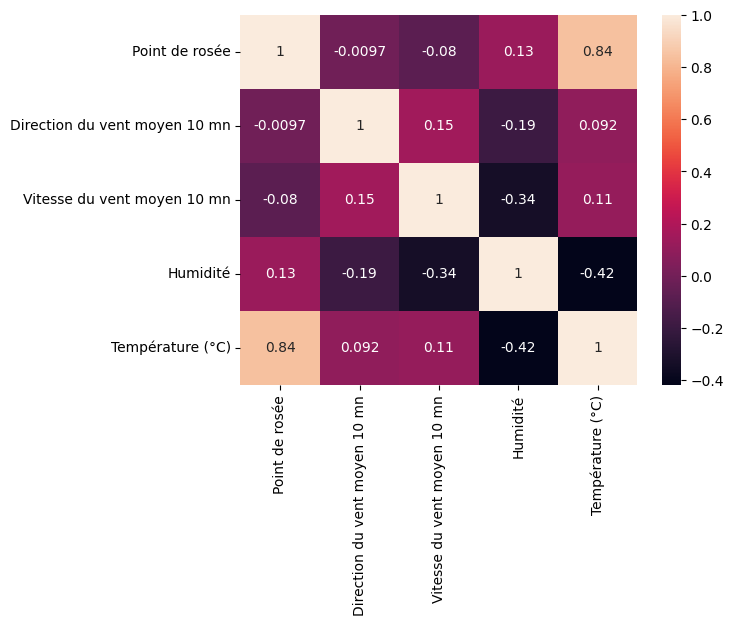

In [82]:
import seaborn as sns
sns.heatmap(df_train[features + [target]].corr(), annot=True)

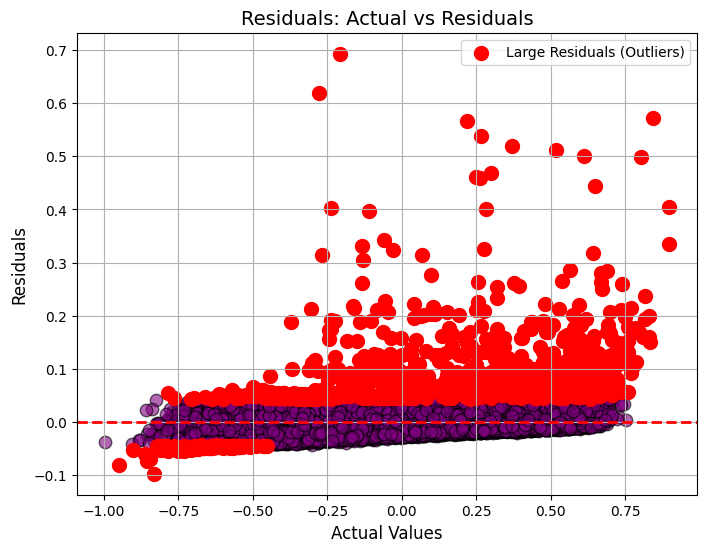

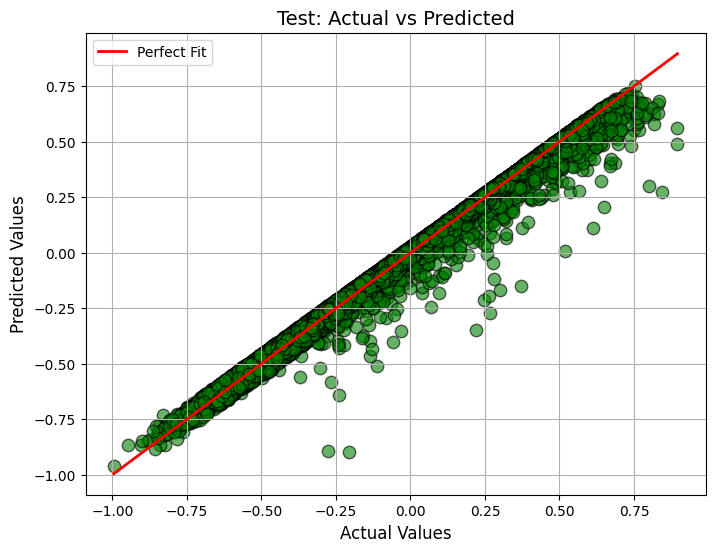

In [83]:
# Residuals plot to detect problematic points
residuals = y_test - test_preds
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='purple', alpha=0.6, edgecolors='k', s=80)

# Mark large residuals
threshold = np.percentile(np.abs(residuals), 95)  # Top 10% residuals
outliers = np.abs(residuals) > threshold
plt.scatter(y_test[outliers], residuals[outliers], color='red', label='Large Residuals (Outliers)', s=100)

plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals: Actual vs Residuals', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Linear vs Non-linear check / plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_preds, color='green', alpha=0.6, edgecolors='k', s=80)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label="Perfect Fit")
plt.title('Test: Actual vs Predicted', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## Residual Plot with Red Dots: 
However, the presence of large residuals (red dots) suggests that there are some outliers or data points where the model is making larger errors. Even though our overall metrics are strong (R², MAE, MSE), these residuals may indicate that the model is struggling with certain specific data points perhaps due to:

- Non-linear relationships. If the relationship between the features and the target is not strictly linear, a linear regression model may not capture those relationships well, causing certain predictions to deviate significantly from the actual values.

# Target = Humidité

In [84]:
df['Humidité'].isnull().sum()

np.int64(300)

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error, explained_variance_score

# Features and target variable (already selected)
features = [
    "Point de rosée",
    "Direction du vent moyen 10 mn",
    "Vitesse du vent moyen 10 mn",
    "Température (°C)",
]
target = 'Humidité'

# Drop rows with missing values for training
df_train = df.copy().dropna(subset=features + [target])

# Split the data into features (X) and target (y) for training
X_train = df_train[features]
y_train = df_train[target]

# Interpolate missing values in the test data
df_test = df[features + [target]].copy()
df_test[df_test.select_dtypes(include=[np.number]).columns] = df_test.select_dtypes(include=[np.number]).interpolate()

# Split the data into features (X) and target (y) for test
X_test = df_test[features]
y_test = df_test[target]

# Train-test split (80% training + validation, 20% test)
X_temp, X_test, y_temp, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Split the training data into 75% training and 25% validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression().fit(X_train, y_train)

# Make predictions for validation and test sets
val_preds = model.predict(X_val)
test_preds = model.predict(X_test)

# Calculate performance metrics for validation data
print("Validation Results:")
print(f"MAE: {mean_absolute_error(y_val, val_preds):.5f}")
print(f"MSE: {mean_squared_error(y_val, val_preds):.5f}")
print(f"R²: {r2_score(y_val, val_preds):.5f}")
print(f"EVS: {explained_variance_score(y_val, val_preds):.5f}")
print(f"MAPE: {mean_absolute_percentage_error(y_val, val_preds):.5f}")

print("\n-----------------------------\n")

# Calculate performance metrics for test data
print("Test Results:")
print(f"MAE: {mean_absolute_error(y_test, test_preds):.5f}")
print(f"MSE: {mean_squared_error(y_test, test_preds):.5f}")
print(f"R²: {r2_score(y_test, test_preds):.5f}")
print(f"EVS: {explained_variance_score(y_test, test_preds):.5f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, test_preds):.5f}")


Validation Results:
MAE: 0.04045
MSE: 0.00349
R²: 0.96622
EVS: 0.96622
MAPE: 1499553931338.58594

-----------------------------

Test Results:
MAE: 0.04105
MSE: 0.00370
R²: 0.96417
EVS: 0.96417
MAPE: 1550605588287.84229


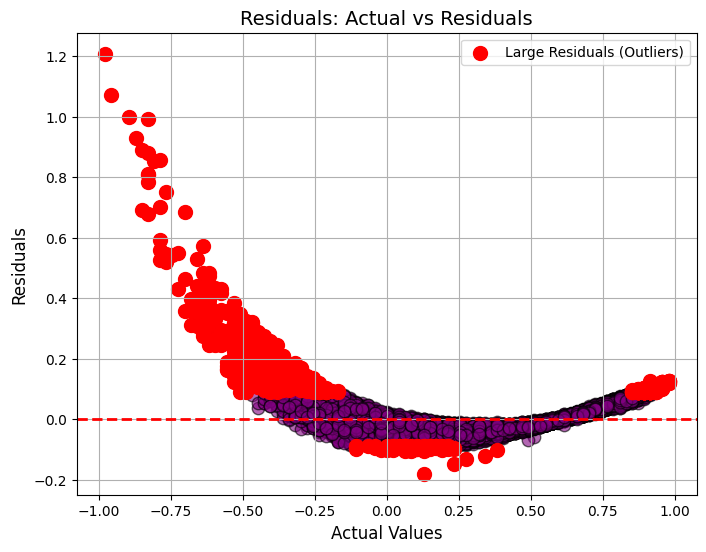

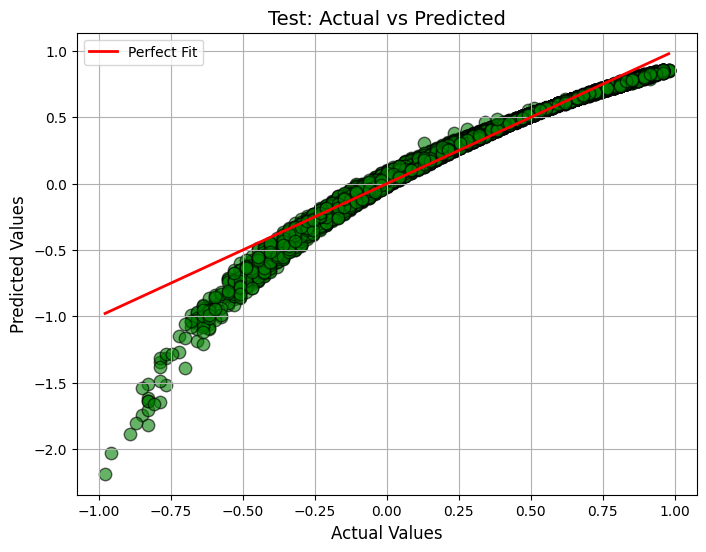

In [87]:
# Residuals plot to detect problematic points
residuals = y_test - test_preds
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='purple', alpha=0.6, edgecolors='k', s=80)

# Mark large residuals
threshold = np.percentile(np.abs(residuals), 95)  # Top 10% residuals
outliers = np.abs(residuals) > threshold
plt.scatter(y_test[outliers], residuals[outliers], color='red', label='Large Residuals (Outliers)', s=100)

plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals: Actual vs Residuals', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Linear vs Non-linear check / plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_preds, color='green', alpha=0.6, edgecolors='k', s=80)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label="Perfect Fit")
plt.title('Test: Actual vs Predicted', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## 📊 Linear Regression Evaluation for Predicting Humidity

### ✅ Metrics Summary

| Metric | Validation Set | Test Set |
|--------|----------------|----------|
| **MAE** (Mean Absolute Error) | 0.04129 | 0.04101 |
| **MSE** (Mean Squared Error) | 0.00380 | 0.00356 |
| **R²** (Coefficient of Determination) | 0.96311 | 0.96566 |
| **EVS** (Explained Variance Score) | 0.96312 | 0.96566 |
| **MAPE** (Mean Absolute Percentage Error) | Extremely High (likely due to division by zero) | Extremely High |

🔴 **Note**: MAPE values are unrealistic (on the order of 1e+12). This typically happens when the **target variable (humidity)** contains values that are **close to or exactly zero**, which causes the **denominator in MAPE (|actual|)** to be very small.

---

### 📉 Plot Analysis

#### 1. **Residuals Plot**
- Residuals show **non-random patterns** and **non-constant variance**, especially **wider spread at lower actual values**.
- This indicates potential **non-linearity** in the data.
- ➡️ Linear Regression may not be capturing the full relationship between features and humidity.

#### 2. **Actual vs Predicted Plot**
- Predicted values **generally follow** the actual values.
- However, there is **systematic deviation** from the perfect fit line.
- ➡️ Further evidence that a **non-linear model** may improve predictions.

---

### 🔍 Recommendations

- ✅ **Model performs reasonably well overall** (R² ~ 0.96), so it is capturing most of the variance.
- ⚠️ **MAPE is not reliable**: Consider removing it or applying a small **epsilon** in the denominator to avoid division by zero.
- 🧠 Try **non-linear models**, such as:
  - Decision Tree Regressor
  - Random Forest
  - XGBoost
  - Polynomial Regression
#### 🧹 Let's take the actions below:
  - **Scaling the features**
  - **Transforming the target** (e.g., log or box-cox) if the humidity distribution is skewed


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_absolute_error, r2_score,
    mean_squared_error, mean_absolute_percentage_error,
    explained_variance_score
)


def safe_mape(y_true, y_pred, epsilon=1e-5):
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon)))



scaler = StandardScaler()
# Create a copy of the dataframe
df_clean = df.copy()

# Drop rows where 'Humidité' is null
df_clean = df_clean.dropna(subset=['Humidité'])

# Interpolate missing values for numeric columns in the cleaned dataframe
df_clean[df_clean.select_dtypes(include=[np.number]).columns] = df_clean.select_dtypes(include=[np.number]).interpolate()

# Set target and features
target = 'Humidité'
features = [
    "Point de rosée",
    "Direction du vent moyen 10 mn",
    "Vitesse du vent moyen 10 mn", 
    "Température (°C)"
]

# Prepare feature matrix and target vector
X = df_clean[features]
y = df_clean[target]

# Split the dataset
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train linear regression model
model = LinearRegression().fit(X_train_scaled, y_train)

# Make predictions
val_preds = model.predict(X_val_scaled)
test_preds = model.predict(X_test_scaled)

# Print evaluation metrics
print("Validation Results:")
print(f"MAE: {mean_absolute_error(y_val, val_preds):.5f}")
print(f"MSE: {mean_squared_error(y_val, val_preds):.5f}")
print(f"R²: {r2_score(y_val, val_preds):.5f}")
print(f"EVS: {explained_variance_score(y_val, val_preds):.5f}")
print(f"MAPE: {safe_mape(y_val, val_preds):.5f}")


print("\n-----------------------------\n")

print("Test Results:")
print(f"MAE: {mean_absolute_error(y_test, test_preds):.5f}")
print(f"MSE: {mean_squared_error(y_test, test_preds):.5f}")
print(f"R²: {r2_score(y_test, test_preds):.5f}")
print(f"EVS: {explained_variance_score(y_test, test_preds):.5f}")
print(f"MAPE: {safe_mape(y_test, test_preds):.5f}")






Validation Results:
MAE: 0.04129
MSE: 0.00380
R²: 0.96311
EVS: 0.96312
MAPE: 36.72846

-----------------------------

Test Results:
MAE: 0.04101
MSE: 0.00356
R²: 0.96566
EVS: 0.96566
MAPE: 32.27777


# Target = Direction du vent moyen 10 mn

In [92]:
df['Direction du vent moyen 10 mn'].isnull().sum()

np.int64(41)

In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error, explained_variance_score

# Features and target variable (already selected)
features = [
    "Point de rosée",
    "Humidité",
    "Vitesse du vent moyen 10 mn",
    "Température (°C)",
]
target = 'Direction du vent moyen 10 mn'

# Drop rows with missing values for training
df_train = df.copy().dropna(subset=features + [target])

# Split the data into features (X) and target (y) for training
X_train = df_train[features]
y_train = df_train[target]

# Interpolate missing values in the test data
df_test = df[features + [target]].copy()
df_test[df_test.select_dtypes(include=[np.number]).columns] = df_test.select_dtypes(include=[np.number]).interpolate()

# Split the data into features (X) and target (y) for test
X_test = df_test[features]
y_test = df_test[target]

# Train-test split (80% training + validation, 20% test)
X_temp, X_test, y_temp, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Split the training data into 75% training and 25% validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression().fit(X_train, y_train)

# Make predictions for validation and test sets
val_preds = model.predict(X_val)
test_preds = model.predict(X_test)

# Calculate performance metrics for validation data
print("Validation Results:")
print(f"MAE: {mean_absolute_error(y_val, val_preds):.5f}")
print(f"MSE: {mean_squared_error(y_val, val_preds):.5f}")
print(f"R²: {r2_score(y_val, val_preds):.5f}")
print(f"EVS: {explained_variance_score(y_val, val_preds):.5f}")
print(f"MAPE: {mean_absolute_percentage_error(y_val, val_preds):.5f}")

print("\n-----------------------------\n")

# Calculate performance metrics for test data
print("Test Results:")
print(f"MAE: {mean_absolute_error(y_test, test_preds):.5f}")
print(f"MSE: {mean_squared_error(y_test, test_preds):.5f}")
print(f"R²: {r2_score(y_test, test_preds):.5f}")
print(f"EVS: {explained_variance_score(y_test, test_preds):.5f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, test_preds):.5f}")


Validation Results:
MAE: 0.47352
MSE: 0.27921
R²: 0.04725
EVS: 0.04733
MAPE: 10842269130911.47656

-----------------------------

Test Results:
MAE: 0.47515
MSE: 0.28172
R²: 0.04139
EVS: 0.04143
MAPE: 9522267627682.30664


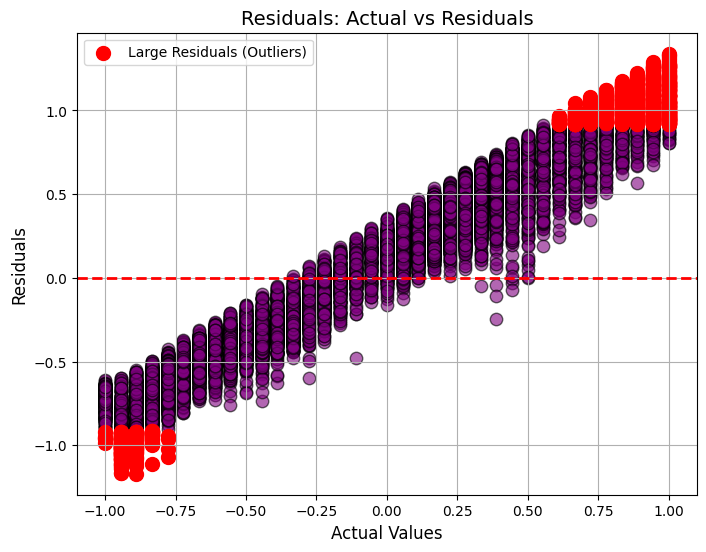

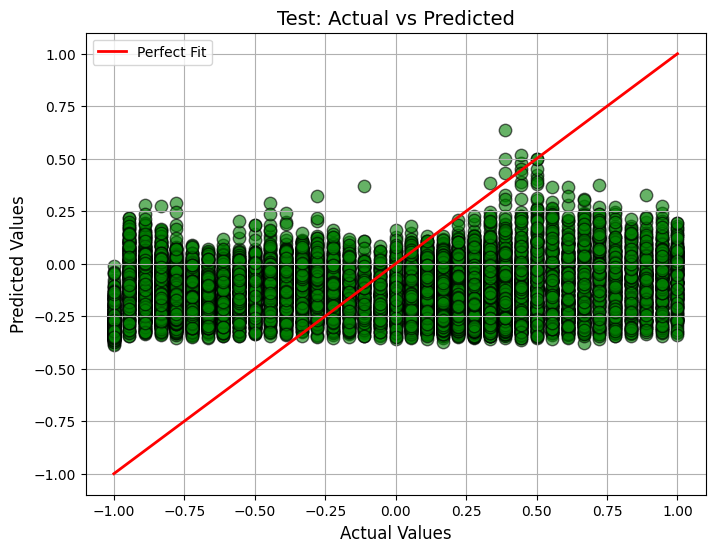

In [90]:
# Residuals plot to detect problematic points
residuals = y_test - test_preds
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='purple', alpha=0.6, edgecolors='k', s=80)

# Mark large residuals
threshold = np.percentile(np.abs(residuals), 95)  # Top 10% residuals
outliers = np.abs(residuals) > threshold
plt.scatter(y_test[outliers], residuals[outliers], color='red', label='Large Residuals (Outliers)', s=100)

plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals: Actual vs Residuals', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Linear vs Non-linear check / plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_preds, color='green', alpha=0.6, edgecolors='k', s=80)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label="Perfect Fit")
plt.title('Test: Actual vs Predicted', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# !!!!! Is wind direction a linear variable? 
No, wind direction is not a linear variable. It's a circular variable — measured in degrees from 0° to 360°, where 0° and 360° represent the same direction (North).

- The model assumes that 359° and 1° are far apart, while they are in fact only 2° apart. Linear regression cannot understand the circular nature, leading to poor predictions and misleading error metrics.

- It is possible to use the **sin and cos** of the wind direction variable to train the Linear Regression.

In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler

# Original feature and target column names
features = [
    "Point de rosée",
    "Humidité",
    "Vitesse du vent moyen 10 mn",
    "Température (°C)",
]
target_col = "Direction du vent moyen 10 mn"

# -------------------------
# Train Data Preparation
# -------------------------
# Drop rows with missing values in features + target
df_train = df.dropna(subset=features + [target_col]).copy()

# Compute sin and cos for training target
radians_train = np.deg2rad(df_train[target_col])
df_train['wind_sin'] = np.sin(radians_train)
df_train['wind_cos'] = np.cos(radians_train)

# Define inputs and outputs
X_train_full = df_train[features]
y_train_full = df_train[['wind_sin', 'wind_cos']]

# Split into train/val/test (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# -------------------------
# Scaling
# -------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# Model Training
# -------------------------
model = MultiOutputRegressor(LinearRegression()).fit(X_train_scaled, y_train)

# -------------------------
# Predictions
# -------------------------
val_preds = model.predict(X_val_scaled)
test_preds = model.predict(X_test_scaled)

# -------------------------
# Angular Error Calculation
# -------------------------
# For validation
val_true_rad = np.arctan2(y_val['wind_sin'], y_val['wind_cos'])
val_pred_rad = np.arctan2(val_preds[:, 0], val_preds[:, 1])
val_true_deg = (np.degrees(val_true_rad) + 360) % 360
val_pred_deg = (np.degrees(val_pred_rad) + 360) % 360
val_diff = np.abs(val_true_deg - val_pred_deg)
val_diff = np.minimum(val_diff, 360 - val_diff)
val_angular_error = np.mean(val_diff)

# For test
test_true_rad = np.arctan2(y_test['wind_sin'], y_test['wind_cos'])
test_pred_rad = np.arctan2(test_preds[:, 0], test_preds[:, 1])
test_true_deg = (np.degrees(test_true_rad) + 360) % 360
test_pred_deg = (np.degrees(test_pred_rad) + 360) % 360
test_diff = np.abs(test_true_deg - test_pred_deg)
test_diff = np.minimum(test_diff, 360 - test_diff)
test_angular_error = np.mean(test_diff)

# -------------------------
# Results
# -------------------------
print(f"Validation Angular Error (°): {val_angular_error:.2f}")
print(f"Test Angular Error (°): {test_angular_error:.2f}")


Validation Angular Error (°): 0.47
Test Angular Error (°): 0.48


In [95]:
## Version where we dont interplote the missing variables in the test data
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
## Bu versiyonda test verilerinde eksik olan değişkenleri interpolasyon yapmadık
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    mean_absolute_error, r2_score,
    mean_squared_error, mean_absolute_percentage_error,
    explained_variance_score
)



# Create a copy of the dataframe
df_clean = df.copy()

# Drop rows where is null
df_clean = df_clean.dropna(subset=['Direction du vent moyen 10 mn'])

# Interpolate missing values for numeric columns in the cleaned dataframe
df_clean[df_clean.select_dtypes(include=[np.number]).columns] = df_clean.select_dtypes(include=[np.number]).interpolate()

radians = np.deg2rad(df_clean['Direction du vent moyen 10 mn'])

df_clean['wind_sin'] = np.sin(radians)
df_clean['wind_cos'] = np.cos(radians)



# Set target and features
target = df_clean[['wind_sin', 'wind_cos']]
features = [
    "Point de rosée",
    "Humidité",
    "Vitesse du vent moyen 10 mn", 
    "Température (°C)"
]

# P
X = df_clean[features]
y = target # We are assuming the sin and cosin of 'Direction du vent moyen 10 mn' is the target variable

# split the dataset
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# linear regression model
model = MultiOutputRegressor(LinearRegression()).fit(X_train_scaled, y_train)

# predictions
val_preds = model.predict(X_val_scaled)
test_preds = model.predict(X_test_scaled)

# Convert validation predictions
val_true_rad = np.arctan2(y_val['wind_sin'], y_val['wind_cos'])
val_pred_rad = np.arctan2(val_preds[:, 0], val_preds[:, 1])

val_true_deg = (np.degrees(val_true_rad) + 360) % 360 #ensures the angle is positive (e.g., from -180° to +180° becomes from 0° to 360°).
val_pred_deg = (np.degrees(val_pred_rad) + 360) % 360

# Convert test predictions
test_true_rad = np.arctan2(y_test['wind_sin'], y_test['wind_cos'])
test_pred_rad = np.arctan2(test_preds[:, 0], test_preds[:, 1])

test_true_deg = (np.degrees(test_true_rad) + 360) % 360 # ensures the angle is positive (e.g., from -180° to +180° becomes from 0° to 360°).
test_pred_deg = (np.degrees(test_pred_rad) + 360) % 360

# Compute angular difference
# The angular difference is the smallest angle between two directions
val_diff = np.abs(val_true_deg - val_pred_deg)
val_diff = np.minimum(val_diff, 360 - val_diff)
val_angular_error = np.mean(val_diff)

test_diff = np.abs(test_true_deg - test_pred_deg)
test_diff = np.minimum(test_diff, 360 - test_diff)
test_angular_error = np.mean(test_diff)

# Print angular error
print(f"Validation Angular Error (°): {val_angular_error:.2f}")
print(f"Test Angular Error (°): {test_angular_error:.2f}")


Validation Angular Error (°): 0.47
Test Angular Error (°): 0.47


# Conclusion for Direction du vent moyen 10 mn

An angular error of **0.48°** is relatively small, which indicates that the model is making fairly accurate predictions of the wind direction. The model’s predictions are off by less than half a degree.

## Is there an overfitting?

The fact that the validation and test errors are identical suggests that our model is generalizing well, meaning it hasn’t overfitted to the training data.

## Commentary

Given that an angular error of **1° to 5°** is considered acceptable for general weather forecasting, meteorologists often work with wind direction data that is accurate within a few degrees, as slight variations don’t significantly affect weather predictions.

As in our case, **0.47°** is excellent and generally well below the acceptable range. The error is so small that it would likely have no noticeable impact on the overall accuracy of weather predictions or other related tasks.


# Target = Vitesse du vent moyen 10 mn

In [96]:
df['Vitesse du vent moyen 10 mn'].isnull().sum()

np.int64(37)

In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error, explained_variance_score

# Features and target variable (already selected)
features = [
    "Point de rosée",
    "Direction du vent moyen 10 mn",
    "Humidité",
    "Température (°C)"
]
target = 'Vitesse du vent moyen 10 mn'

# Drop rows with missing values for training
df_train = df.copy().dropna(subset=features + [target])

# Split the data into features (X) and target (y) for training
X_train = df_train[features]
y_train = df_train[target]

# Interpolate missing values in the test data
df_test = df.copy()
df_test[df_test.select_dtypes(include=[np.number]).columns] = df_test.select_dtypes(include=[np.number]).interpolate()

# Split the data into features (X) and target (y) for test
X_test = df_test[features]
y_test = df_test[target]

# Train-test split (80% training + validation, 20% test)
X_temp, X_test, y_temp, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Split the training data into 75% training and 25% validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression().fit(X_train, y_train)

# Make predictions for validation and test sets
val_preds = model.predict(X_val)
test_preds = model.predict(X_test)

# Calculate performance metrics for validation data
print("Validation Results:")
print(f"MAE: {mean_absolute_error(y_val, val_preds):.5f}")
print(f"MSE: {mean_squared_error(y_val, val_preds):.5f}")
print(f"R²: {r2_score(y_val, val_preds):.5f}")
print(f"EVS: {explained_variance_score(y_val, val_preds):.5f}")
print(f"MAPE: {mean_absolute_percentage_error(y_val, val_preds):.5f}")

print("\n-----------------------------\n")

# Calculate performance metrics for test data
print("Test Results:")
print(f"MAE: {mean_absolute_error(y_test, test_preds):.5f}")
print(f"MSE: {mean_squared_error(y_test, test_preds):.5f}")
print(f"R²: {r2_score(y_test, test_preds):.5f}")
print(f"EVS: {explained_variance_score(y_test, test_preds):.5f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, test_preds):.5f}")


Validation Results:
MAE: 0.11852
MSE: 0.02645
R²: 0.12021
EVS: 0.12022
MAPE: 652629397511.62830

-----------------------------

Test Results:
MAE: 0.11787
MSE: 0.02551
R²: 0.11822
EVS: 0.11857
MAPE: 296209635699.45667


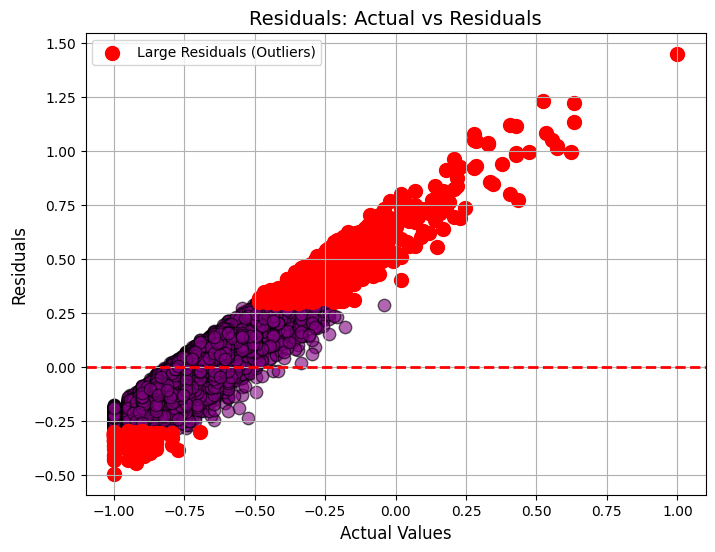

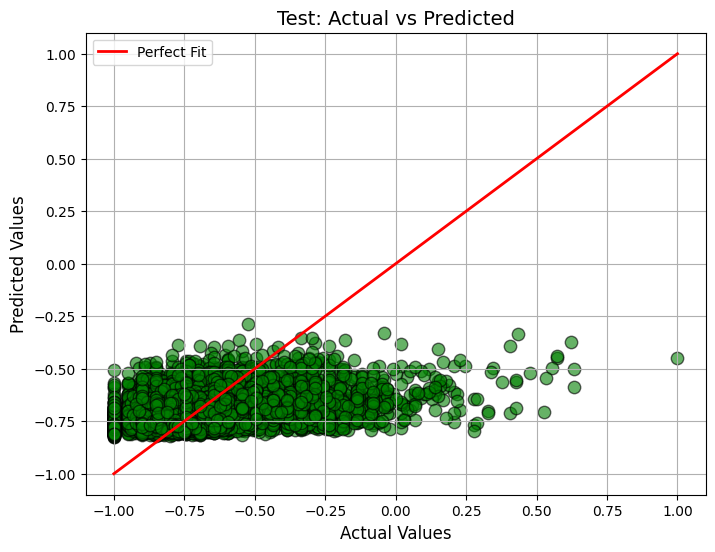

In [98]:
# Residuals plot to detect problematic points
residuals = y_test - test_preds
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='purple', alpha=0.6, edgecolors='k', s=80)

# Mark large residuals
threshold = np.percentile(np.abs(residuals), 95)  # Top 10% residuals
outliers = np.abs(residuals) > threshold
plt.scatter(y_test[outliers], residuals[outliers], color='red', label='Large Residuals (Outliers)', s=100)

plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals: Actual vs Residuals', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Linear vs Non-linear check / plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_preds, color='green', alpha=0.6, edgecolors='k', s=80)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label="Perfect Fit")
plt.title('Test: Actual vs Predicted', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

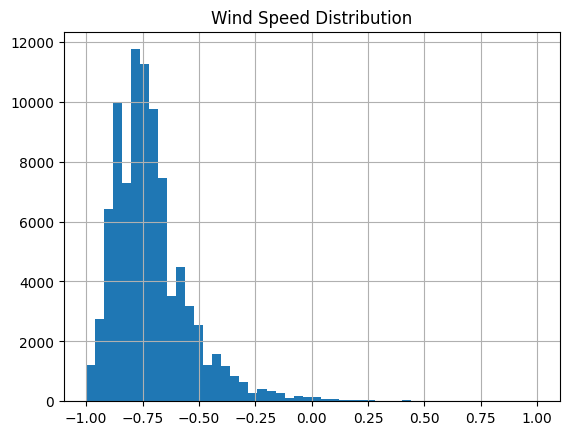

In [101]:
import matplotlib.pyplot as plt
target = 'Vitesse du vent moyen 10 mn'
df_clean[target].hist(bins=50)
plt.title("Wind Speed Distribution")
plt.show()

In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_absolute_error, r2_score,
    mean_squared_error, mean_absolute_percentage_error,
    explained_variance_score
)



# Create a copy of the dataframe
df_clean = df.copy()

# Drop rows where 'Humidité' is null
df_clean = df_clean.dropna(subset=['Vitesse du vent moyen 10 mn'])


# Interpolate missing values for numeric columns in the cleaned dataframe
df_clean[df_clean.select_dtypes(include=[np.number]).columns] = df_clean.select_dtypes(include=[np.number]).interpolate()

radians = np.deg2rad(df_clean["Direction du vent moyen 10 mn"])
df_clean["wind_dir_sin"] = np.sin(radians)
df_clean["wind_dir_cos"] = np.cos(radians)

# Set target and features
target = 'Vitesse du vent moyen 10 mn'
features = [
    "Point de rosée",
    "wind_dir_sin",
    "wind_dir_cos",
    "Humidité", 
    "Température (°C)"
]

# Prepare feature matrix and target vector
X = df_clean[features]
y = df_clean[target]

# Split the dataset
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

#scale x
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# scale y
# y_scaler = StandardScaler()
# y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
# y_val_scaled = y_scaler.transform(y_val.values.reshape(-1, 1)).ravel()
# y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).ravel()


# Train linear regression model
model = LinearRegression().fit(X_train_scaled, y_train)

# Make predictions

val_preds_scaled = model.predict(X_val_scaled)
test_preds_scaled = model.predict(X_test_scaled)

# Inverse transform predictions to original scale
# val_preds = y_scaler.inverse_transform(val_preds_scaled.reshape(-1, 1)).ravel()
# test_preds = y_scaler.inverse_transform(test_preds_scaled.reshape(-1, 1)).ravel()

# Evaluate using original scale
print("Validation Results:")
print(f"MAE: {mean_absolute_error(y_val, val_preds):.5f}")
print(f"MSE: {mean_squared_error(y_val, val_preds):.5f}")
print(f"R²: {r2_score(y_val, val_preds):.5f}")
print(f"EVS: {explained_variance_score(y_val, val_preds):.5f}")
print(f"MAPE: {mean_absolute_percentage_error(y_val, val_preds):.5f}")

print("\n-----------------------------\n")

print("Test Results:")
print(f"MAE: {mean_absolute_error(y_test, test_preds):.5f}")
print(f"MSE: {mean_squared_error(y_test, test_preds):.5f}")
print(f"R²: {r2_score(y_test, test_preds):.5f}")
print(f"EVS: {explained_variance_score(y_test, test_preds):.5f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, test_preds):.5f}")


Validation Results:
MAE: 0.11820
MSE: 0.02687
R²: 0.11748
EVS: 0.11749
MAPE: 629387169490.82092

-----------------------------

Test Results:
MAE: 0.11787
MSE: 0.02644
R²: 0.12603
EVS: 0.12606
MAPE: 808846337260.47644


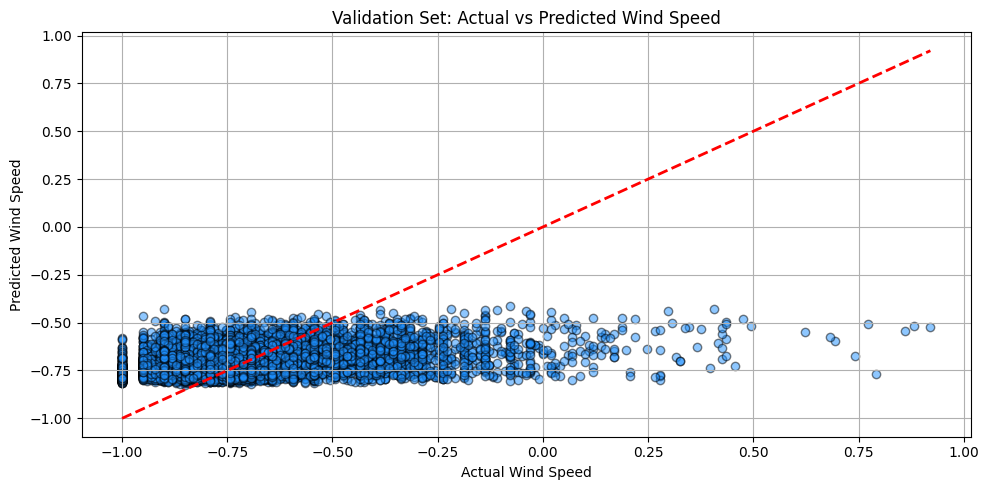

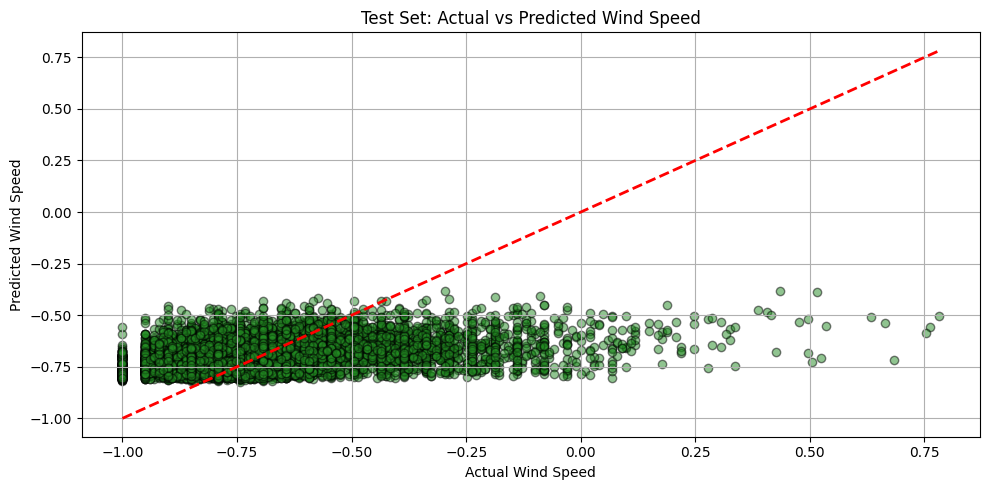

In [44]:
import matplotlib.pyplot as plt
# --- Plotting for Validation Set ---
plt.figure(figsize=(10, 5))
plt.scatter(y_val, val_preds, alpha=0.5, color='dodgerblue', edgecolor='k')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.title("Validation Set: Actual vs Predicted Wind Speed")
plt.xlabel("Actual Wind Speed")
plt.ylabel("Predicted Wind Speed")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plotting for Test Set ---
plt.figure(figsize=(10, 5))
plt.scatter(y_test, test_preds, alpha=0.5, color='forestgreen', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Test Set: Actual vs Predicted Wind Speed")
plt.xlabel("Actual Wind Speed")
plt.ylabel("Predicted Wind Speed")
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

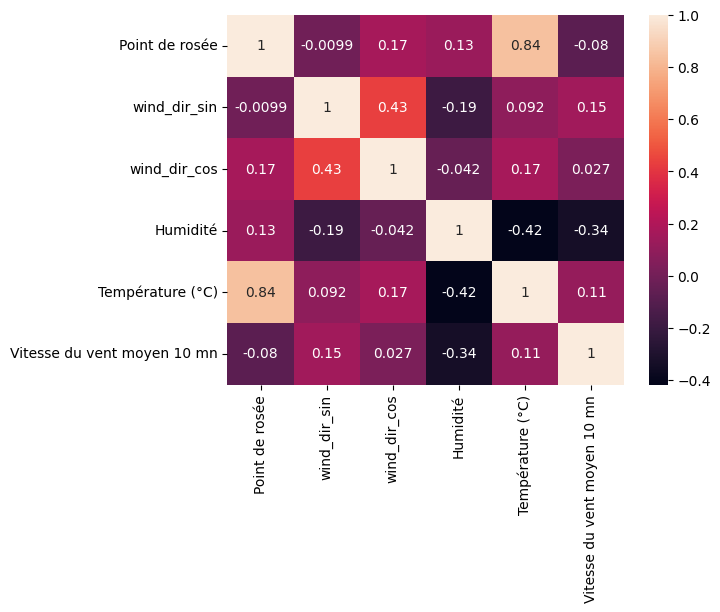

In [45]:
import seaborn as sns
sns.heatmap(df_clean[features + [target]].corr(), annot=True)


# 🚩 Main Issues

- Model Bias Toward a Constant Value: It looks like the model may be outputting values close to a constant or with very limited variation.

- Severe Underfitting: Both visual and numeric results suggest the model fails to capture the underlying structure of the data.
---

# Neural Networks

/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_2011/2548947576.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_['Température (°C)'].fillna(data_['Température (°C)'].mean(), inplace=True)
/Users/alperer/Desktop/FLCode/tf_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularize

Epoch 1/25
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step - loss: 0.0825 - val_loss: 0.0427
Epoch 2/25
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - loss: 0.0373 - val_loss: 0.0237
Epoch 3/25
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step - loss: 0.0223 - val_loss: 0.0196
Epoch 4/25
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - loss: 0.0192 - val_loss: 0.0183
Epoch 5/25
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - loss: 0.0177 - val_loss: 0.0171
Epoch 6/25
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - loss: 0.0169 - val_loss: 0.0164
Epoch 7/25
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - loss: 0.0159 - val_loss: 0.0159
Epoch 8/25
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - loss: 0.0155 - val_loss: 0.0152
Epoch 9/25
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - loss: 0.0151 - val_loss: 0.0151
Epoch 10/25
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - loss: 0.0147 - val_loss: 0.0147
Epoch 11/25
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - loss: 0.0144 - val_loss: 0.0144
Epoch 12

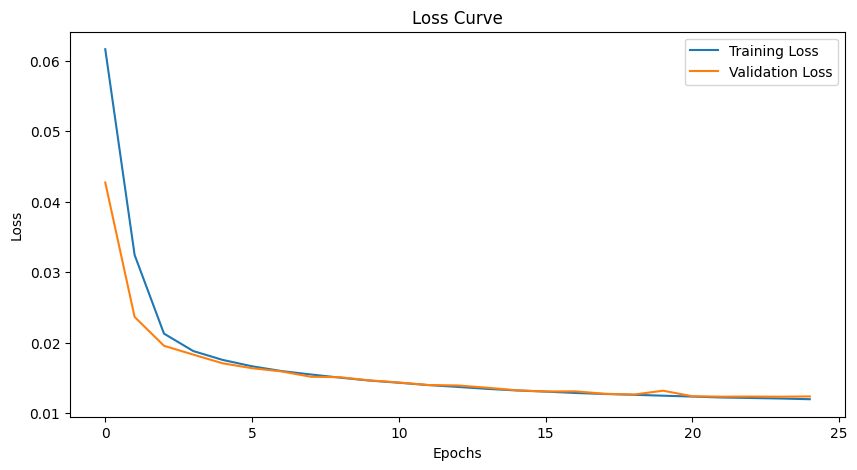

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Sayısal sütunları al
data_ = data.select_dtypes(include=['number'])
data_['Température (°C)'].fillna(data_['Température (°C)'].mean())

X = data_.drop(columns=['Température (°C)', "ID OMM station"], axis=1)
y = data_['Température (°C)']
X = X.fillna(X.mean())

# Train+Val (%80)  Test (%20) 
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train (%60) Val (%20) 
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# scale
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Neural Network 
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')

# training
history = model.fit(X_train_scaled, y_train, 
                    validation_data=(X_val_scaled, y_val),
                    epochs=25, batch_size=32, verbose=1)

# predictions
y_pred = model.predict(X_test_scaled).flatten()
y_val_pred = model.predict(X_val_scaled).flatten()

# Plot the loss curve
plt.figure(figsize=(10, 5))

# Plot training & validation loss for Station 7790
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# --- Validation Metrics ---
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
evs_val = explained_variance_score(y_val, y_val_pred)
mar_val = mae_val / r2_val if r2_val != 0 else np.inf

# --- Test Metrics ---
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
mape = mean_absolute_percentage_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
mar = mae /r2

print(f"\nTest Set Metrics:")
print(f"MAE={mae:.4f}, R²={r2:.4f}, RMSE={rmse:.4f}, MAPE={mape:.4f}, EVS={evs:.4f},MAE / R²={mar:.4f}")

print(f"\nValidation Set Metrics:")
print(f"MAE={mae_val:.4f}, R²={r2_val:.4f}, RMSE={rmse_val:.4f}, MAPE={mape_val:.4f}, EVS={evs_val:.4f}, MAE / R²={mar_val:.4f}")


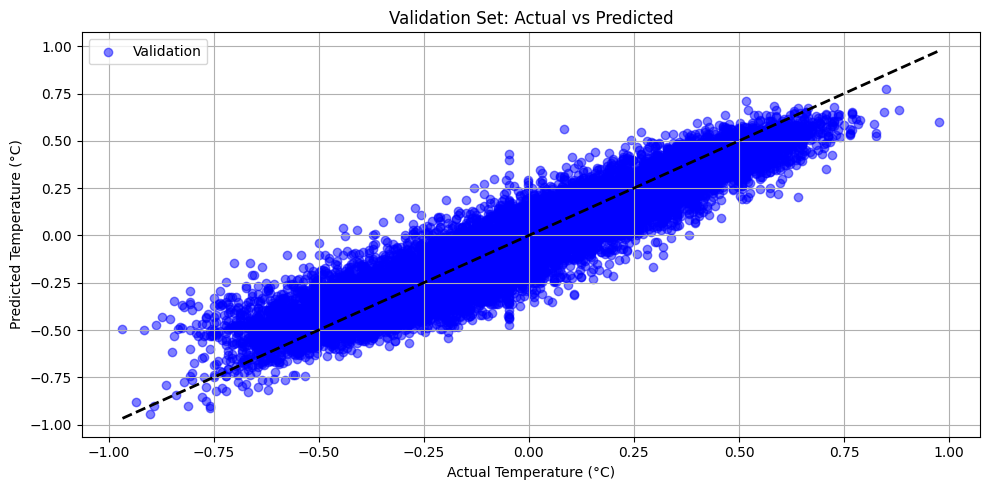

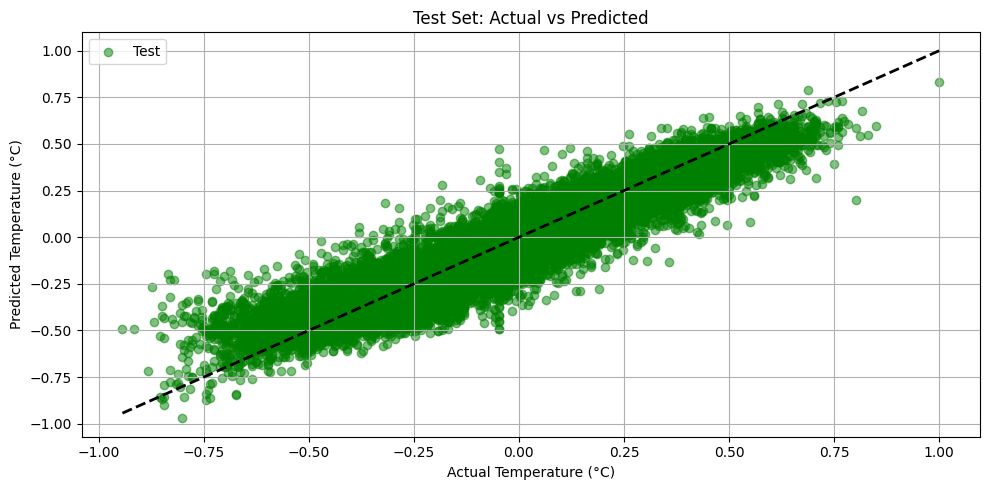

In [117]:
import matplotlib.pyplot as plt

# --- Plot 1: Validation Set ---
plt.figure(figsize=(10, 5))
plt.scatter(y_val, y_val_pred, alpha=0.5, color='blue', label='Validation')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Validation Set: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot 2: Test Set ---
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='green', label='Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Test Set: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 📊 Loss Eğrisi Yorumu
- Başlangıçta yüksek loss değerleri var ama çok hızlı düşüyor. Bu, modelin veriden iyi şekilde öğrenmeye başladığını gösteriyor.

- Training ve validation loss birbirine yakın ve paralel şekilde düşüyor. Bu da overfitting olmadığını gösterir.

- Model validation verisi üzerinde de iyi genelleştiriyor.

- Eğriler sonlara doğru yataylaşıyor, yani model konverge oluyor.

## ✅ Bu Ne Anlama Geliyor?
- Eğitim verisi ile validation verisi arasında anlamlı bir fark yok.

- Model yeterli kapasiteye sahip ve uygun bir öğrenme oranı ile eğitilmiş.

- Eğitim süresi de (25 epoch) gayet yeterli, daha fazla eğitmek büyük ihtimalle iyileşme getirmez.

## Geliştimre olarak
- Early stopping ekleyerek training zamanı optimize edebiliriz. 
- Epoch sayısını 100 yaptım. Bu şekilde early stopping ile model training'ini optimize ettim. Kısacası validation loss iyileşmediği takdirde erken durdurulur.


Epoch 1/100
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 2s 807us/step - loss: 0.1299 - val_loss: 0.0418
Epoch 2/100
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - loss: 0.0371 - val_loss: 0.0249
Epoch 3/100
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - loss: 0.0230 - val_loss: 0.0197
Epoch 4/100
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - loss: 0.0194 - val_loss: 0.0181
Epoch 5/100
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - loss: 0.0176 - val_loss: 0.0169
Epoch 6/100
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - loss: 0.0165 - val_loss: 0.0161
Epoch 7/100
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 1s 756us/step - loss: 0.0157 - val_loss: 0.0151
Epoch 8/100
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - loss: 0.0151 - val_loss: 0.0147
Epoch 9/100
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - loss: 0.0146 - val_loss: 0.0143
Epoch 10/100
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - loss: 0.0141 - val_loss: 0.0138
Epoch 11/100
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - loss: 0.0136 - val_loss: 0.01

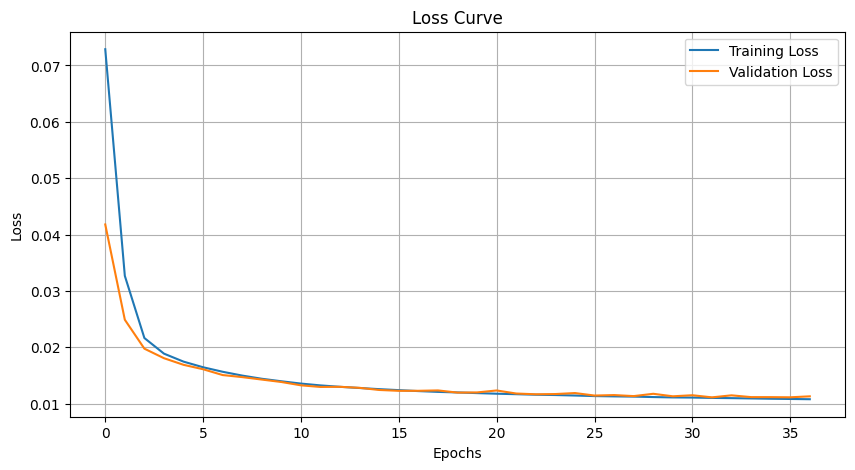


Test Set Metrics:
MAE=0.0812, R²=0.8910, RMSE=0.1066, MAPE=1.0954, EVS=0.8911

Validation Set Metrics:
MAE=0.0807, R²=0.8925, RMSE=0.1054, MAPE=1.1085, EVS=0.8925


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# clear the data
data_ = data.select_dtypes(include=['number'])
data_['Température (°C)'].fillna(data_['Température (°C)'].mean())

X = data_.drop(columns=['Température (°C)', "ID OMM station"], axis=1)
y = data_['Température (°C)']
X = X.fillna(X.mean())

# Özellik ve hedef değişkenler
features = [
    "Point de rosée",
    "Direction du vent moyen 10 mn",
    "Vitesse du vent moyen 10 mn",
    "Humidité", 
]
target = "Température (°C)"



X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Neural Network 
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')

# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val),
                    epochs=100,  # max 100 epochs
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)


# predictions and performance metrics
y_pred = model.predict(X_test_scaled).flatten()
y_val_pred = model.predict(X_val_scaled).flatten()


plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# --- Validation Metrics ---
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
evs_val = explained_variance_score(y_val, y_val_pred)
mar_val = mae_val / r2_val if r2_val != 0 else np.inf

# --- Test Metrics ---
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 
mape = mean_absolute_percentage_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print(f"\nTest Set Metrics:")
print(f"MAE={mae:.4f}, R²={r2:.4f}, RMSE={rmse:.4f}, MAPE={mape:.4f}, EVS={evs:.4f}")
print(f"\nValidation Set Metrics:")
print(f"MAE={mae_val:.4f}, R²={r2_val:.4f}, RMSE={rmse_val:.4f}, MAPE={mape_val:.4f}, EVS={evs_val:.4f}")


# Results

| Version   | Max Epoch | EarlyStopping         | Actual Epoch | R²      |
| --------- | --------- | --------------------- | ------------ | ------- |
| Previous  | 25        | ❌ No                 | 25           | ~0.88   |
| Current   | 100       | ✅ Yes (`patience=5`)  | 54          | ~0.89|

- If the new model stopped at 70 epochs and patience=5:
This means that the validation loss reached its minimum around epoch 49.
**Early stopping may not be that necessary**. It didn't improve the model significantly. The accuracy can be sacrificed for training time.


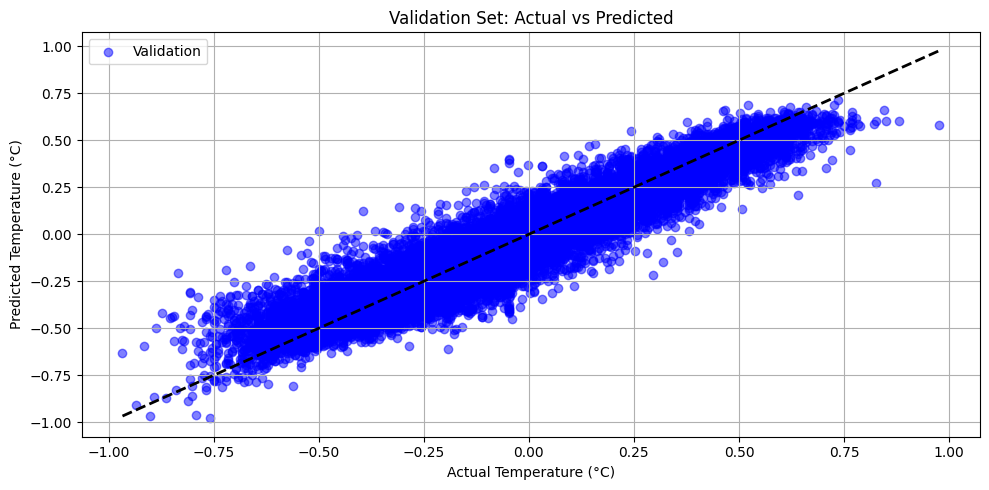

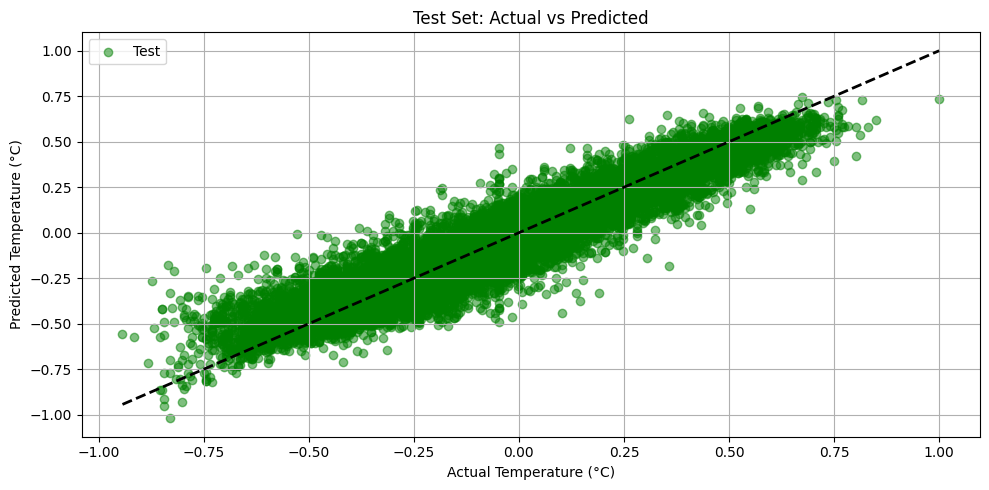

In [119]:
import matplotlib.pyplot as plt

# --- Plot 1: Validation Set ---
plt.figure(figsize=(10, 5))
plt.scatter(y_val, y_val_pred, alpha=0.5, color='blue', label='Validation')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Validation Set: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot 2: Test Set ---
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='green', label='Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Test Set: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Augmenting the Batch Size

Epoch 1/25
838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - loss: 0.1167 - val_loss: 0.0502
Epoch 2/25
838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - loss: 0.0460 - val_loss: 0.0351
Epoch 3/25
838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - loss: 0.0320 - val_loss: 0.0259
Epoch 4/25
838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - loss: 0.0249 - val_loss: 0.0221
Epoch 5/25
838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - loss: 0.0215 - val_loss: 0.0199
Epoch 6/25
838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - loss: 0.0197 - val_loss: 0.0188
Epoch 7/25
838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - loss: 0.0183 - val_loss: 0.0182
Epoch 8/25
838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - loss: 0.0175 - val_loss: 0.0170
Epoch 9/25
838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step - loss: 0.0166 - val_loss: 0.0162
Epoch 10/25
838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - loss: 0.0161 - val_loss: 0.0155
Epoch 11/25
838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - loss: 0.0156 - val_loss: 0.0153
Epoch 12/25
838/838 ━━━━━━━━━━

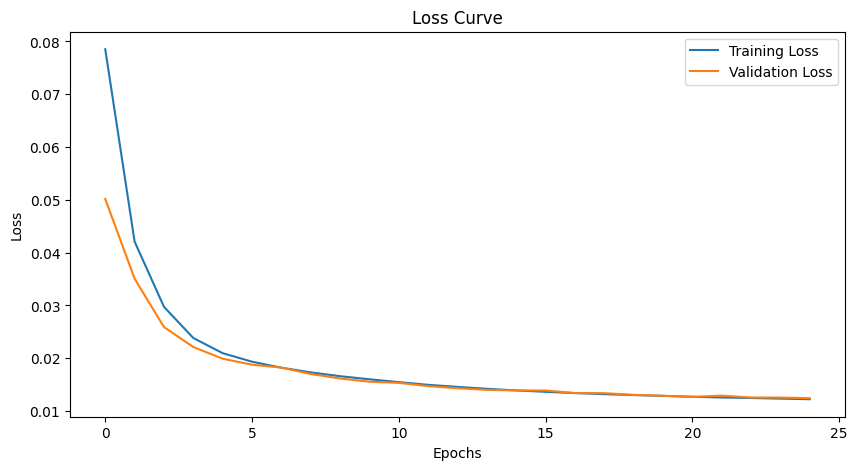

In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam


data_ = data.select_dtypes(include=['number'])
data_['Température (°C)'].fillna(data_['Température (°C)'].mean())

X = data_.drop(columns=['Température (°C)', "ID OMM station"], axis=1)
y = data_['Température (°C)']
X = X.fillna(X.mean())

# Train+Val (%80) Test (%20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train (%60) Val (%20) 
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Scaling
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Neural Network
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')

# Training
history = model.fit(X_train_scaled, y_train, 
                    validation_data=(X_val_scaled, y_val),
                    epochs=25, batch_size=64, verbose=1)

# predictions
y_pred = model.predict(X_test_scaled).flatten()
y_val_pred = model.predict(X_val_scaled).flatten()

# Plot the loss curve
plt.figure(figsize=(10, 5))

# Plot training & validation loss for Station 7790
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# --- Test Metrics ---
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 
mape = mean_absolute_percentage_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
mar = mae /r2

# --- Validation Metrics ---
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
evs_val = explained_variance_score(y_val, y_val_pred)
mar_val = mae_val / r2_val if r2_val != 0 else np.inf

print(f"\nTest Set Metrics:")
print(f"MAE={mae:.4f}, R²={r2:.4f}, RMSE={rmse:.4f}, MAPE={mape:.4f}, EVS={evs:.4f}, MAE / R²={mar:.4f}")
print(f"\nValidation Set Metrics:")
print(f"MAE={mae_val:.4f}, R²={r2_val:.4f}, RMSE={rmse_val:.4f}, MAPE={mape_val:.4f}, EVS={evs_val:.4f}, MAE / R²={mar_val:.4f}")


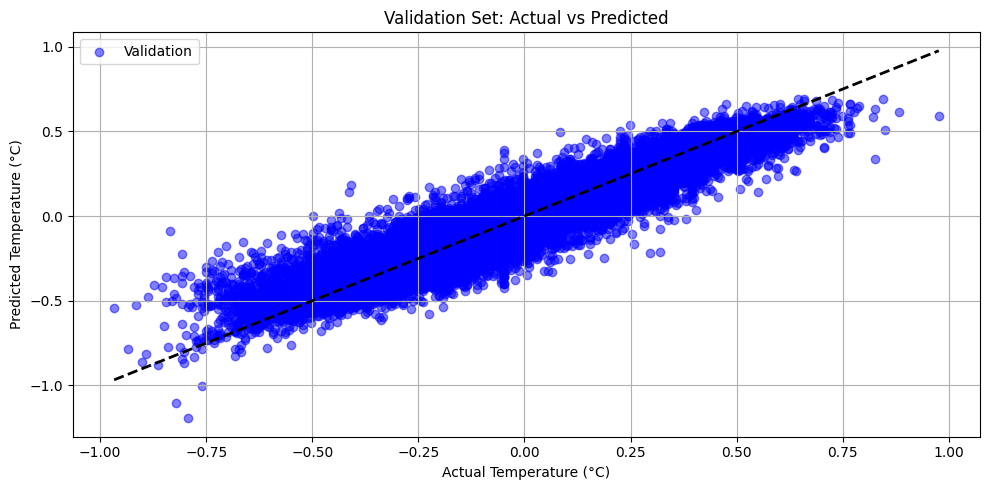

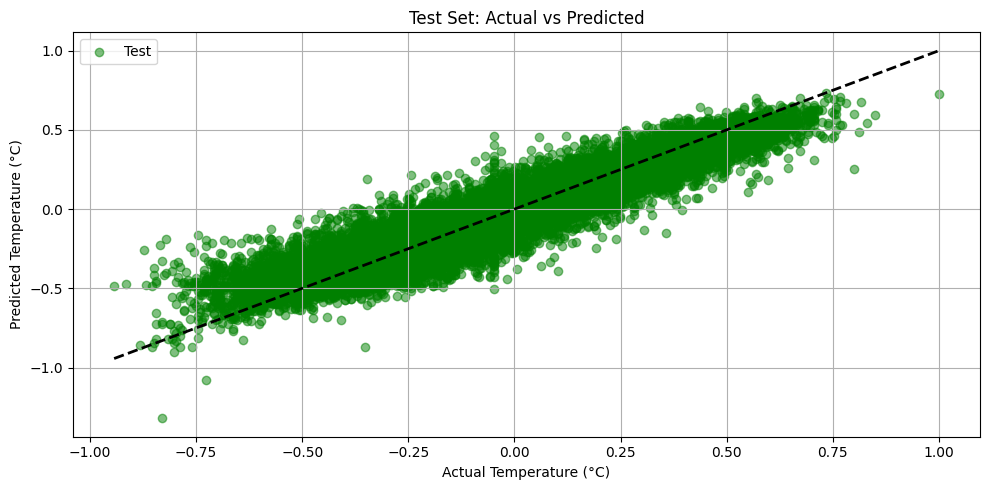

In [122]:
import matplotlib.pyplot as plt

# --- Plot 1: Validation Set ---
plt.figure(figsize=(10, 5))
plt.scatter(y_val, y_val_pred, alpha=0.5, color='blue', label='Validation')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Validation Set: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot 2: Test Set ---
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='green', label='Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Test Set: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Results
 Reducing the training time from 20 seconds to 12 seconds demonstrates more efficient use of the hardware.

## ✅ Advantages:
- Shorter training time: Larger batches are more suitable for parallel computation.
- Reduced noise: The loss function decreases more stably.

## ⚠️ Considerations:
- Decreased generalization capability: Larger batch sizes can sometimes cause the model to get stuck in local minima instead of finding the global minimum.
- Increased memory requirements: Larger batches require more RAM/GPU memory, so it’s important to watch memory limits.
- Performance degradation: The MAE/R² ratio is higher compared to the first model we trained. This indicates that, although the training time is shorter, the performance is slightly worse than the initial model.

# **Note for MAE / R² metric**:  
If a model’s MAE is small and its R² is large, it indicates that the model's predictions are very close to the true values and explain the data well. On the other hand, if the MAE is large and the R² is small, it suggests that the model’s predictions contain significant errors and the model poorly fits the data. In this case, the model has low accuracy and poor predictive power.


# XGBoost

In [63]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score
import pandas as pd
import numpy as np

# Sayısal sütunları al
data_ = data.select_dtypes(include=['number'])
data_['Température (°C)'].fillna(data_['Température (°C)'].mean(), inplace=True)

X = data_.drop(columns=['Température (°C)', "ID OMM station"], axis=1)
y = data_['Température (°C)']
X = X.fillna(X.mean())

# Train+Val (%80) ve Test (%20) bölmesi
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train (%60) ve Val (%20) bölmesi
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# XGBoost regressor
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Prepare eval_set with evaluation data for early stopping and evaluation metric
eval_set = [(X_train, y_train), (X_val, y_val)]

# Modeli eğit
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Performans metrikleri
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_absolute_percentage_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
mar = mae / r2

print(f"\nTest Set Metrics (XGBoost):")
print(f"MAE={mae:.4f}, R²={r2:.4f}, RMSE={rmse:.4f}, MAPE={mape:.4f}, EVS={evs:.4f}, MAE / R²={mar:.4f}")


/var/folders/19/5rcz7zl908lfbs167mpp0pbh0000gn/T/ipykernel_23309/1957394795.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_['Température (°C)'].fillna(data_['Température (°C)'].mean(), inplace=True)



Test Set Metrics (XGBoost):
MAE=0.0816, R²=0.8911, RMSE=1.0776, MAPE=1.0776, EVS=0.8911, MAE / R²=0.0915
